In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from get_to_know_data import load_data, set_start_time_to_zero

In [2]:
# path to all raw outputs

raw_outputs = Path("../data_sync/old_outputs/raw outputs")
files = list(raw_outputs.glob("*.csv"))
print(f"Training files: {len(files)}")

Training files: 25


In [28]:
# find index for  BIA24-4 WR
for j, file in enumerate(files):
    # file is a pathlib.Path (PosixPath); check against its name (string)
    if "4_WR" in file.name:
        print(j)

In [42]:
# plot speed vs speed over time for a random file
file = files[3]
data = load_data(file)
data = set_start_time_to_zero(data, time_col='tt_s', unix=False)

print(data.columns)

Index(['sessionid', 'tt_s', 'distance_m', 'slope_pct', 'speed_kmph', 'power_w',
       'heartrate_bpm', 'frequency_ppm', 'cycle', 'thrust_left_ms',
       'thrust_right_ms', 'impulse_left_ns', 'impulse_right_ns',
       'force_meanl_n', 'force_meanr_n', 'f_tot_mean_n', 'treadmill_force_n',
       'altitude_m', 'latitude_deg', 'longitude_deg', 'usernote = BIA24-18WR',
       'Variant', 'Sport', 'ns1:Id', 'StartTime', 'ns1:TotalTimeSeconds',
       'ns1:DistanceMeters', 'ns1:MaximumSpeed', 'ns1:Calories', 'ns1:Value',
       'ns1:Value2', 'ns1:Intensity', 'ns1:TriggerMethod', 'ns1:Time',
       'ns1:AltitudeMeters', 'ns1:DistanceMeters3', 'ns1:Value4', 'ns2:Speed',
       'ns2:RunCadence', 'ns2:Watts', 'ns1:LatitudeDegrees',
       'ns1:LongitudeDegrees', 'ns2:AvgSpeed', 'ns2:AvgRunCadence',
       'ns2:MaxRunCadence', 'ns2:AvgWatts', 'ns2:MaxWatts', 'ns1:Name',
       'ns1:UnitId', 'ns1:ProductID', 'ns1:VersionMajor', 'ns1:VersionMinor',
       'ns1:BuildMajor', 'ns1:BuildMinor', 'ns1:N

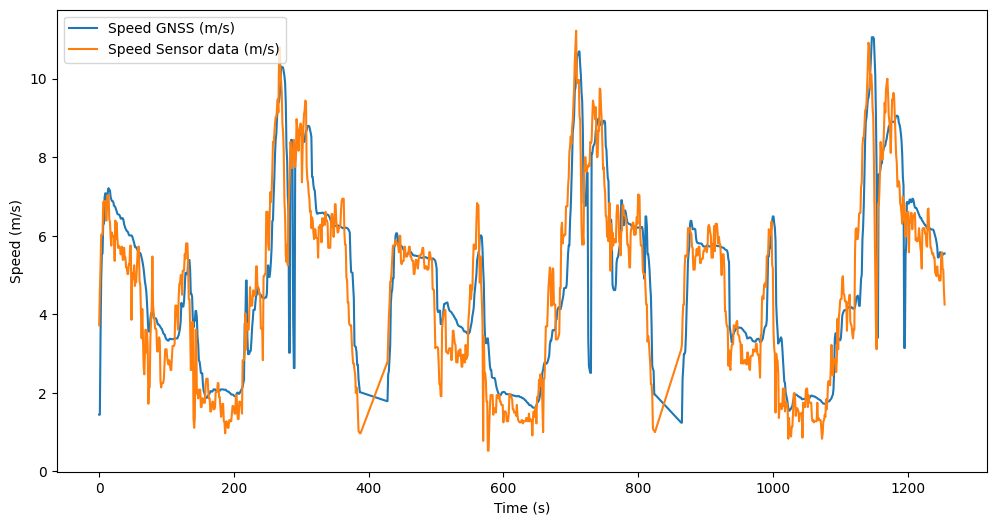

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(data["tt_s"], data['ns2:Speed'], label="Speed GNSS (m/s)")
plt.plot(data["tt_s"], data["speed_kmph"]/3.6, label="Speed Sensor data (m/s)")
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.legend()
plt.show()

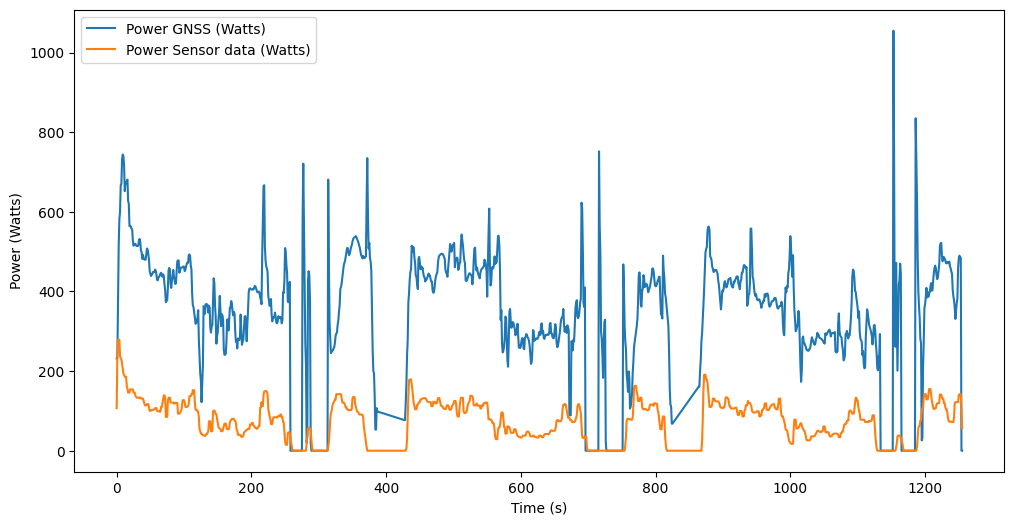

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(data["tt_s"], data['ns2:Watts'], label="Power GNSS (Watts)")
plt.plot(data["tt_s"], data["power_w"], label="Power Sensor data (Watts)")
plt.xlabel("Time (s)")
plt.ylabel("Power (Watts)")
plt.legend()
plt.show()

240
223


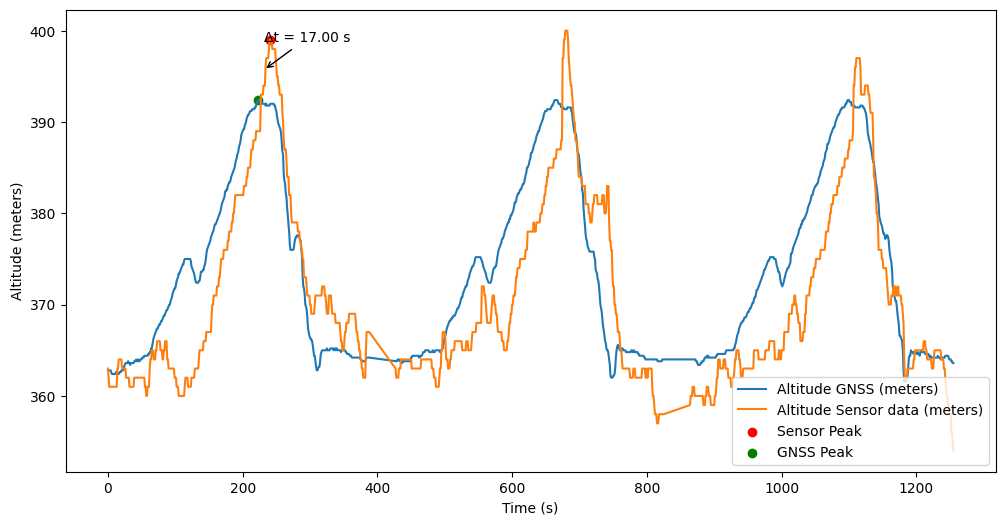

In [41]:
# measure time between peaks
index_1_3 = len(data) // 3
index_sensor = np.argmax(data['altitude_m'][0:index_1_3].values)
print(data["tt_s"][index_sensor])
index_gnss = np.argmax(data['ns1:AltitudeMeters'][0:index_1_3].values)
print(data["tt_s"][index_gnss])

plt.figure(figsize=(12, 6))
plt.plot(data["tt_s"], data['ns1:AltitudeMeters'], label="Altitude GNSS (meters)")
plt.plot(data["tt_s"], data["altitude_m"], label="Altitude Sensor data (meters)")
plt.scatter(data["tt_s"][index_sensor], data["altitude_m"][index_sensor], color='red', label="Sensor Peak")
plt.scatter(data["tt_s"][index_gnss], data["ns1:AltitudeMeters"][index_gnss], color='green', label="GNSS Peak")
# plot delta time between peaks
delta_time = data["tt_s"][index_sensor] - data["tt_s"][index_gnss]
plt.annotate(f"Δt = {delta_time:.2f} s", xy=((data["tt_s"][index_sensor] + data["tt_s"][index_gnss]) / 2, 
                                               (data["altitude_m"][index_sensor] + data["ns1:AltitudeMeters"][index_gnss]) / 2),
             xytext=(0, 20), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='black'))
plt.xlabel("Time (s)")
plt.ylabel("Altitude (meters)")
plt.legend()
plt.show()

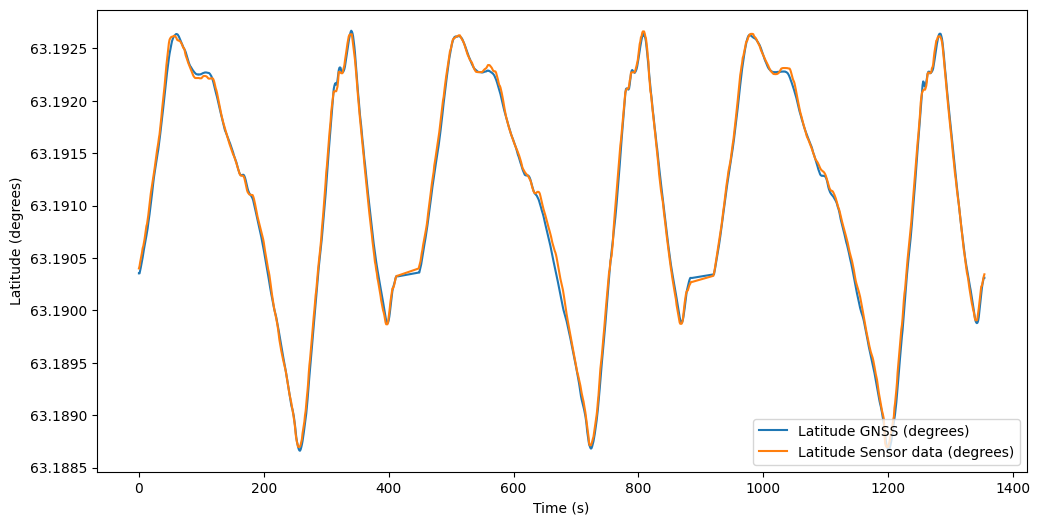

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(data["tt_s"], data['ns1:LatitudeDegrees'], label="Latitude GNSS (degrees)")
plt.plot(data["tt_s"], data["latitude_deg"], label="Latitude Sensor data (degrees)")
plt.xlabel("Time (s)")
plt.ylabel("Latitude (degrees)")
plt.legend()
plt.show()

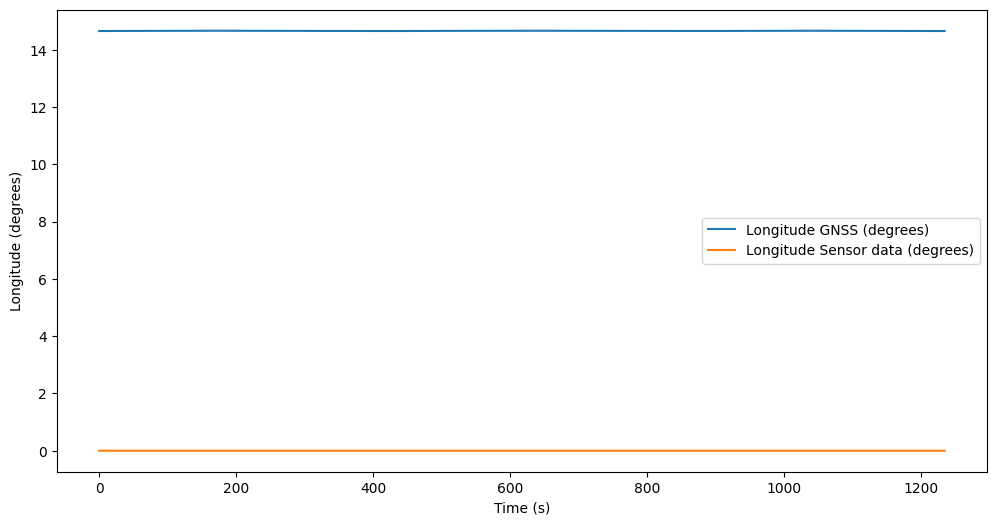

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data["tt_s"], data['ns1:LongitudeDegrees'], label="Longitude GNSS (degrees)")
plt.plot(data["tt_s"], data["longitude_deg"], label="Longitude Sensor data (degrees)")
plt.xlabel("Time (s)")
plt.ylabel("Longitude (degrees)")
plt.legend()
plt.show()

In [10]:
raw_outputs = Path("../data_sync/outputs")
files = list(raw_outputs.glob("*.csv"))

In [16]:
def plot_comparison_alt_lat_lon_all_skiers(file):
    data = load_data(file)
    data = set_start_time_to_zero(data, time_col='tt_s', unix=False)

    plt.figure(figsize=(12, 6))
    plt.plot(data["tt_s"], data['ns1:AltitudeMeters'], label="Altitude GNSS (meters)")
    plt.plot(data["tt_s"], data["altitude_m"], label="Altitude Sensor data (meters)")
    plt.xlabel("Time (s)")
    plt.ylabel("Altitude (meters)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(data["tt_s"], data['ns1:LatitudeDegrees'], label="Latitude GNSS (degrees)")
    plt.plot(data["tt_s"], data["latitude_deg"], label="Latitude Sensor data (degrees)")
    plt.xlabel("Time (s)")
    plt.ylabel("Latitude (degrees)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(data["tt_s"], data['ns1:LongitudeDegrees'], label="Longitude GNSS (degrees)")
    plt.plot(data["tt_s"], data["longitude_deg"], label="Longitude Sensor data (degrees)")
    plt.xlabel("Time (s)")
    plt.ylabel("Longitude (degrees)")
    plt.legend()
    plt.show()

Plotting data for file: BIA24-17_WR_merged_with_gear.csv


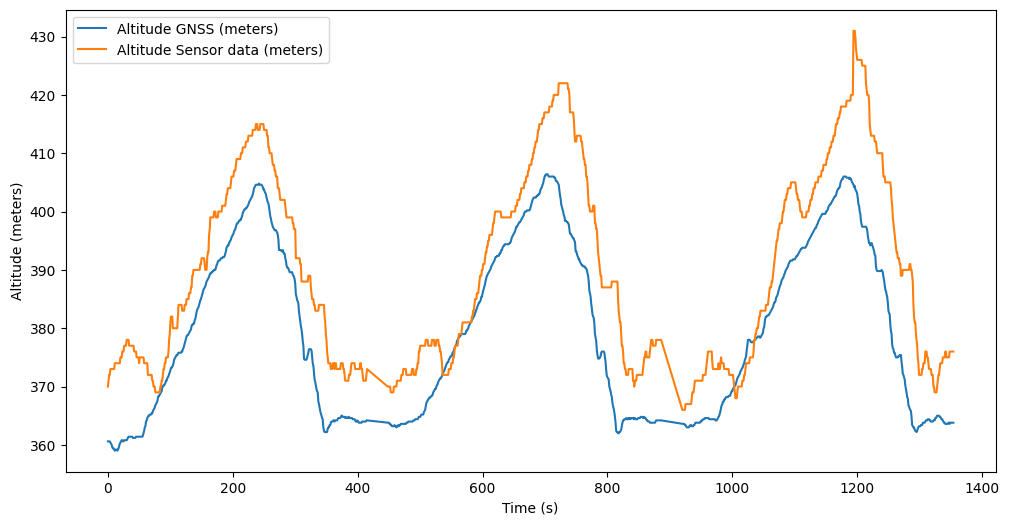

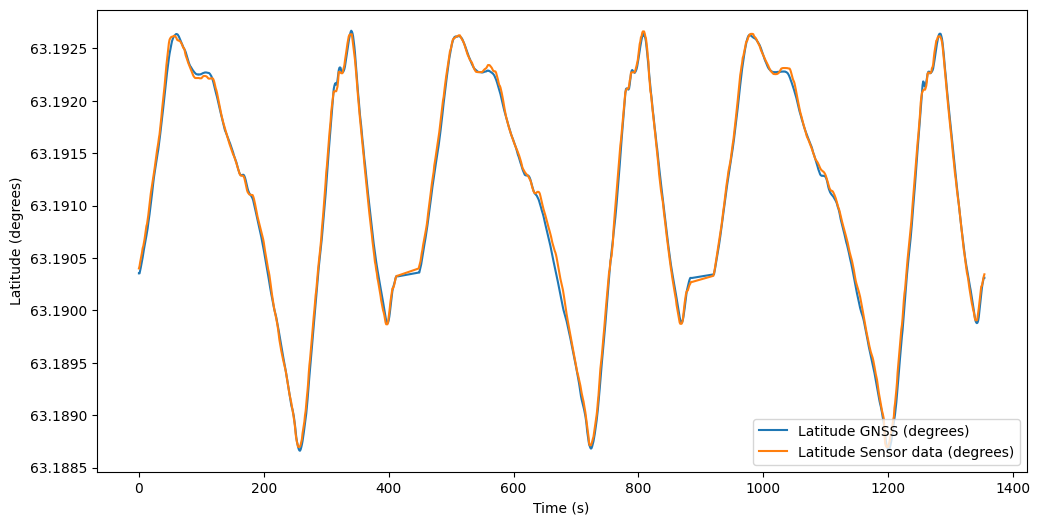

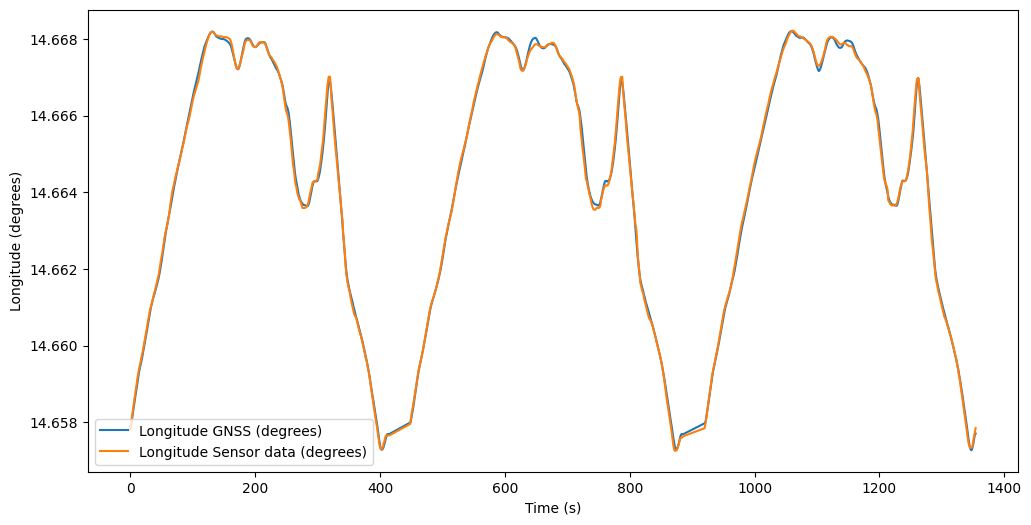

Plotting data for file: BIA24-8_NR_merged_with_gear.csv


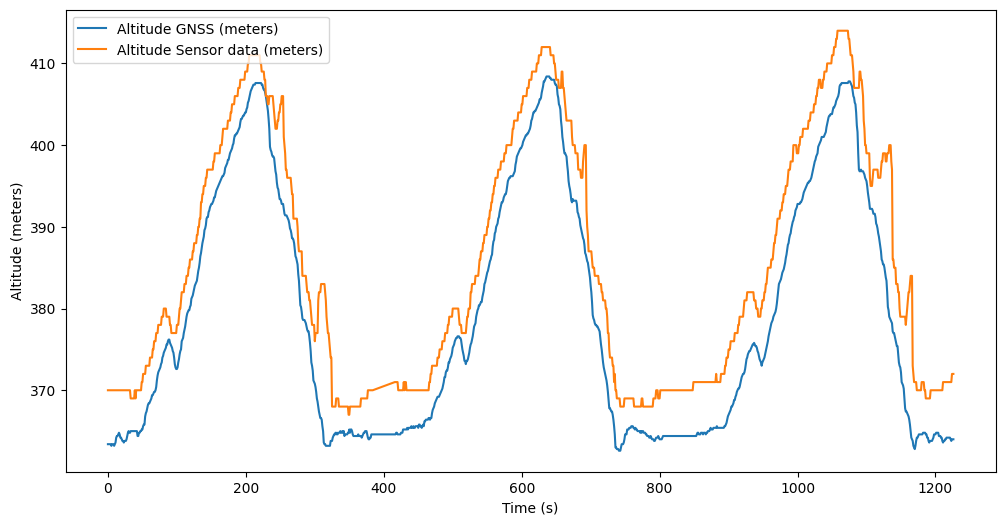

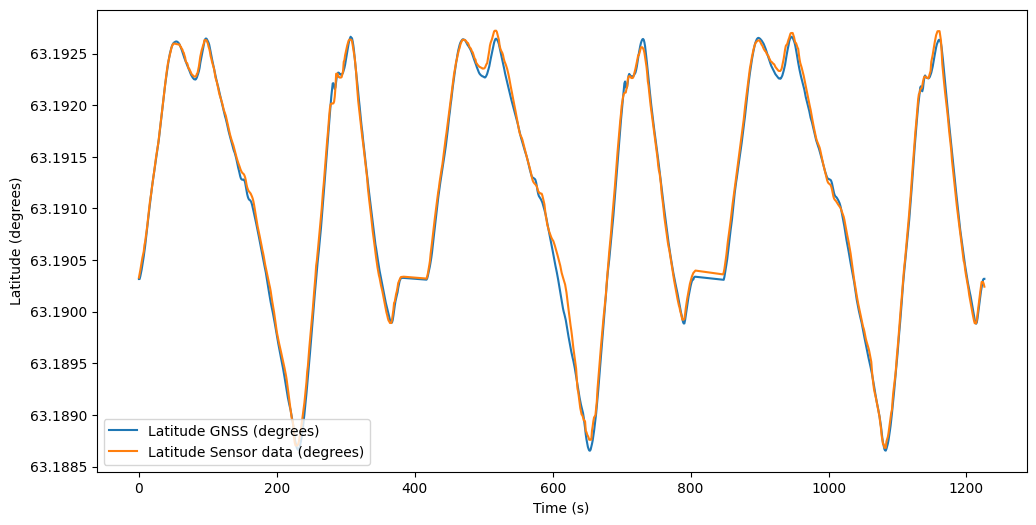

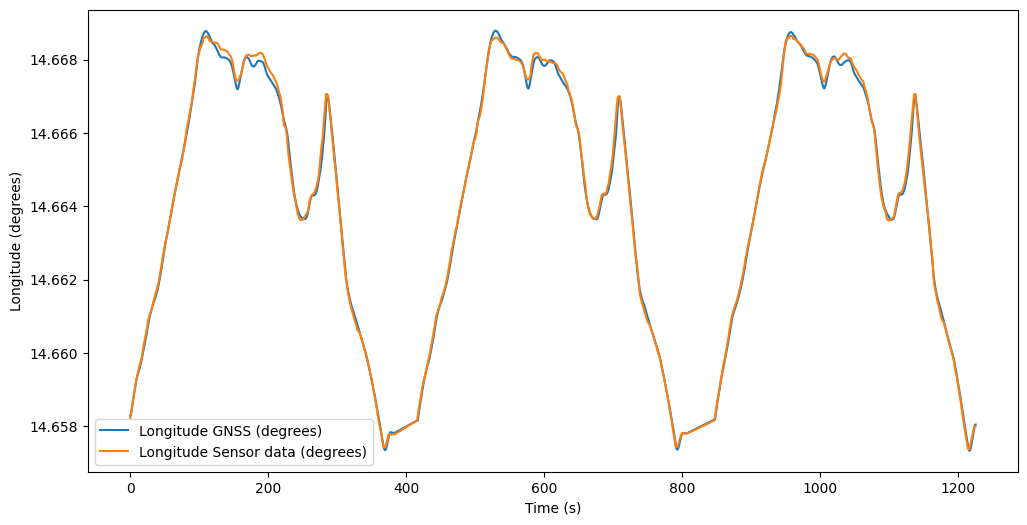

Plotting data for file: BIA24-7_NR_merged_with_gear.csv


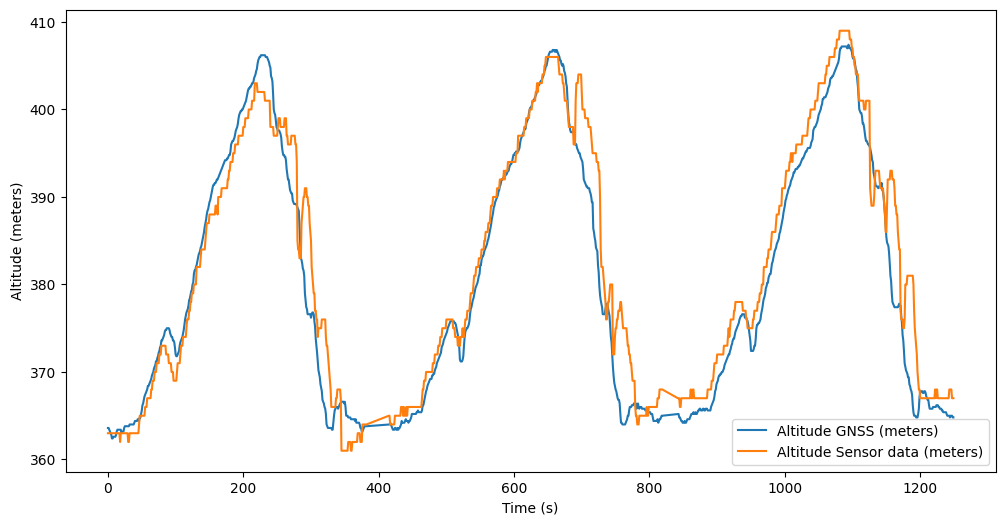

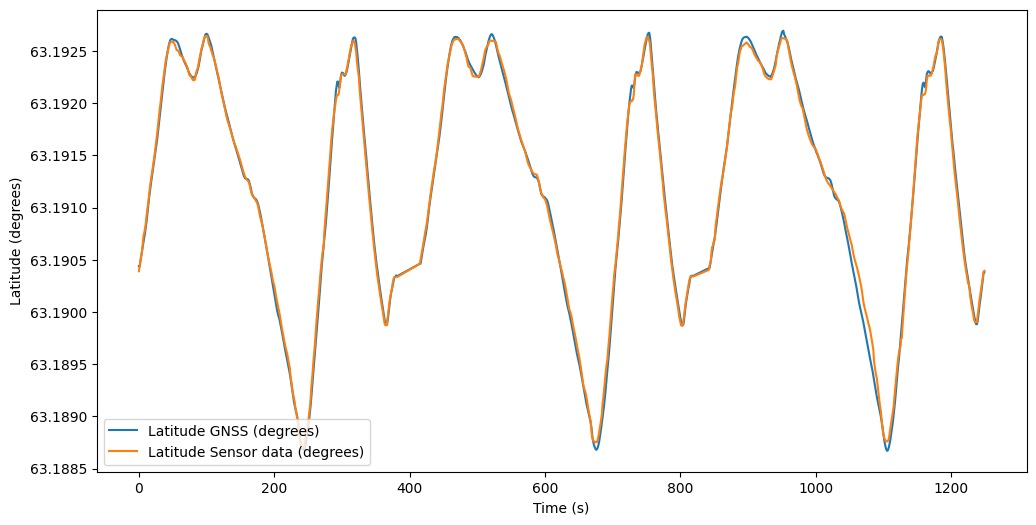

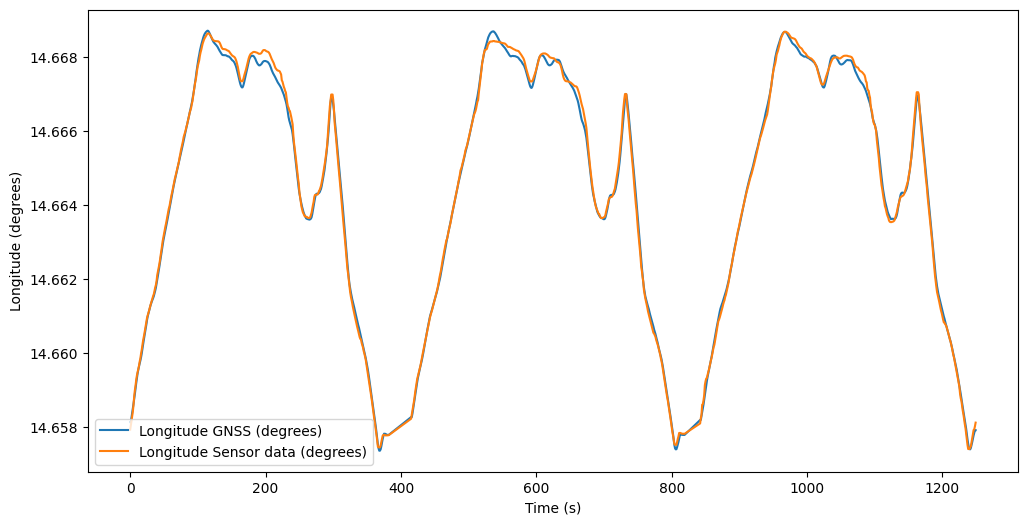

Plotting data for file: BIA24-18_WR_merged_with_gear.csv


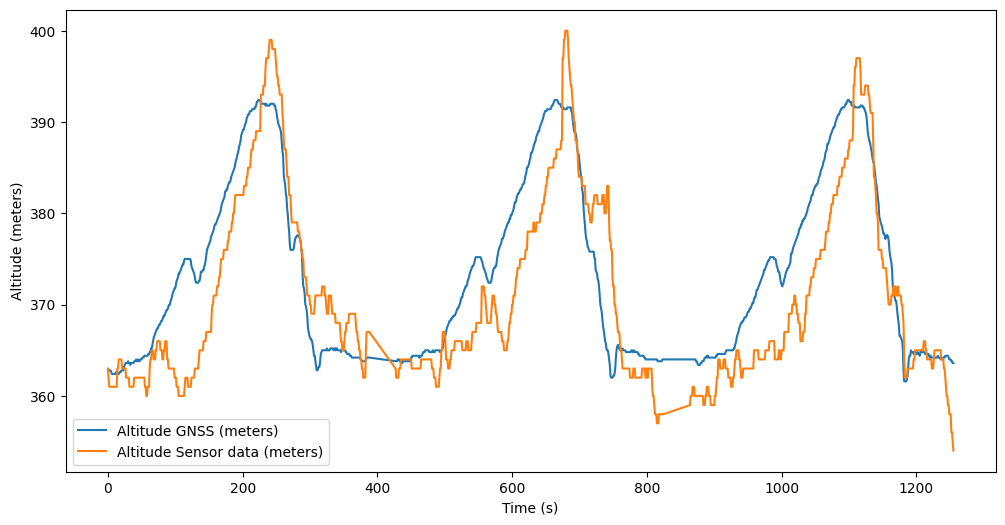

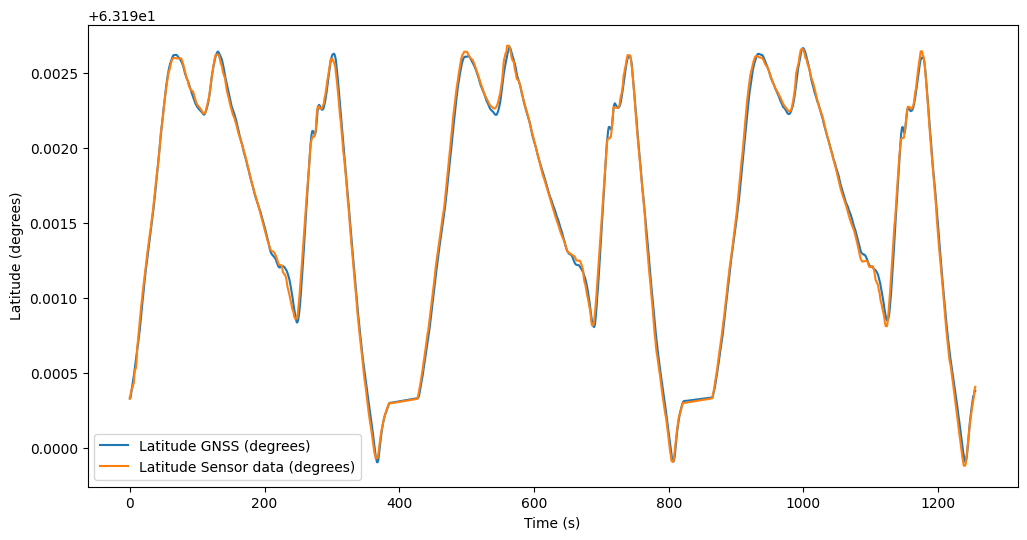

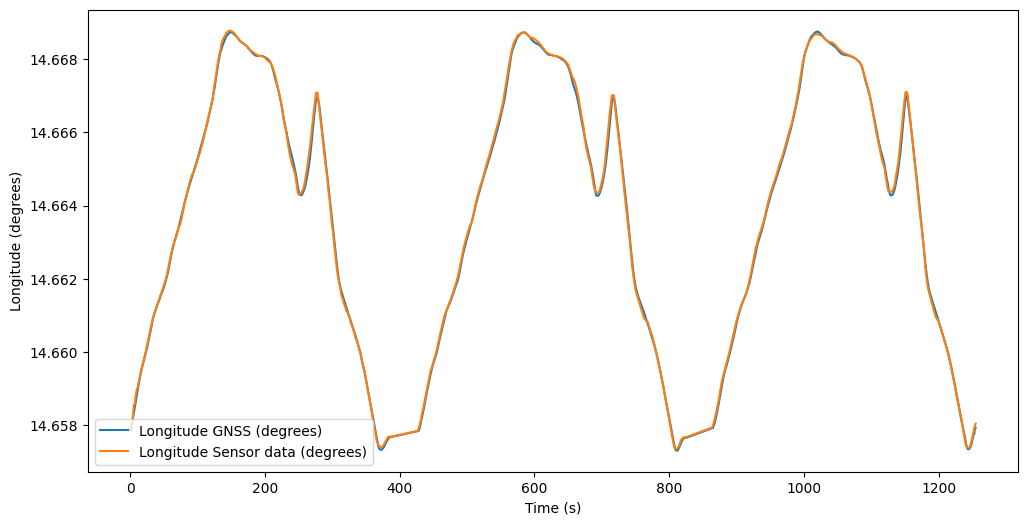

Plotting data for file: BIA24-18_NR_merged_with_gear.csv


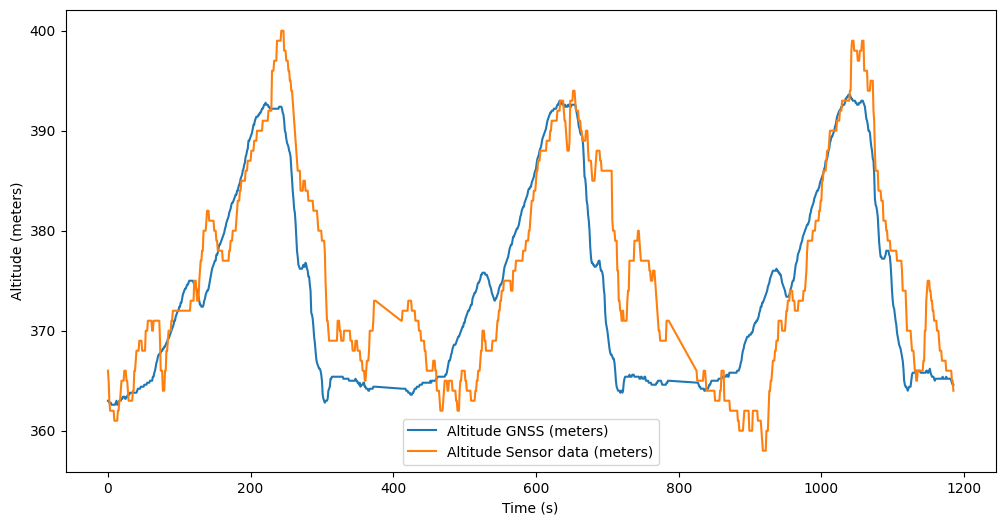

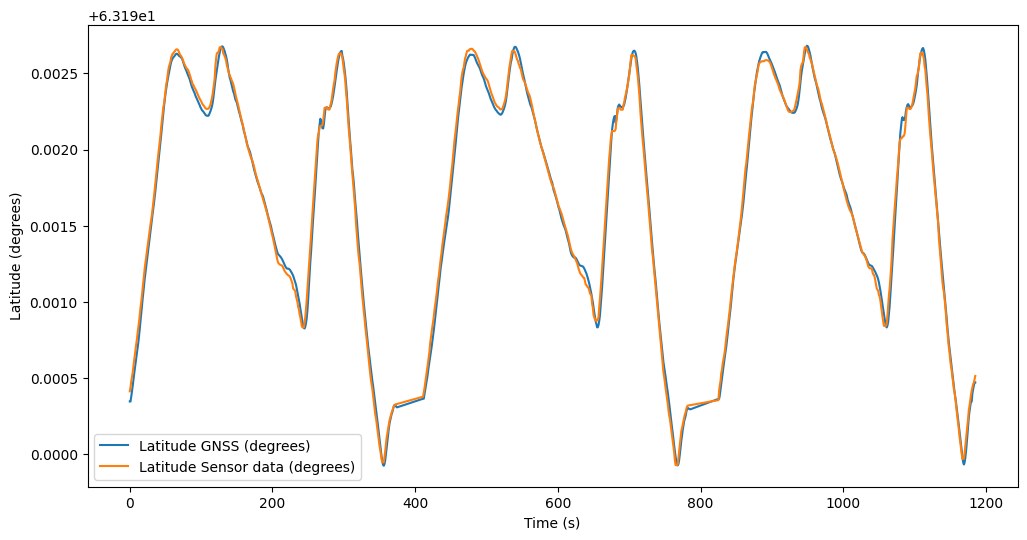

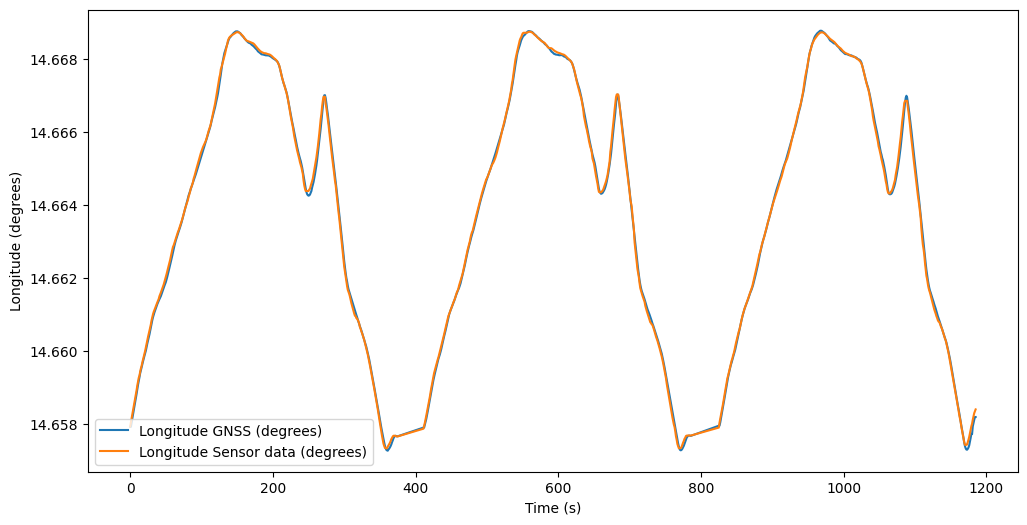

Plotting data for file: BIA24-7_WR_merged_with_gear.csv


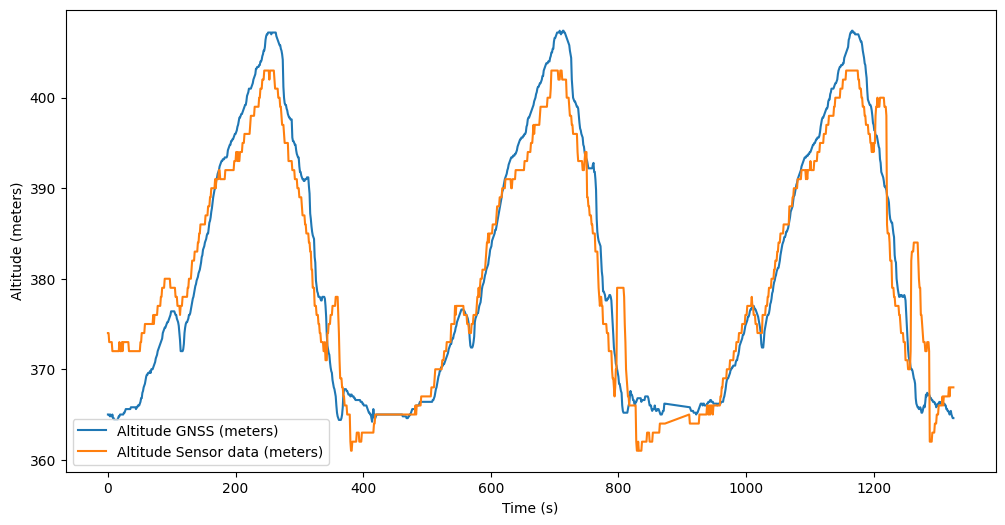

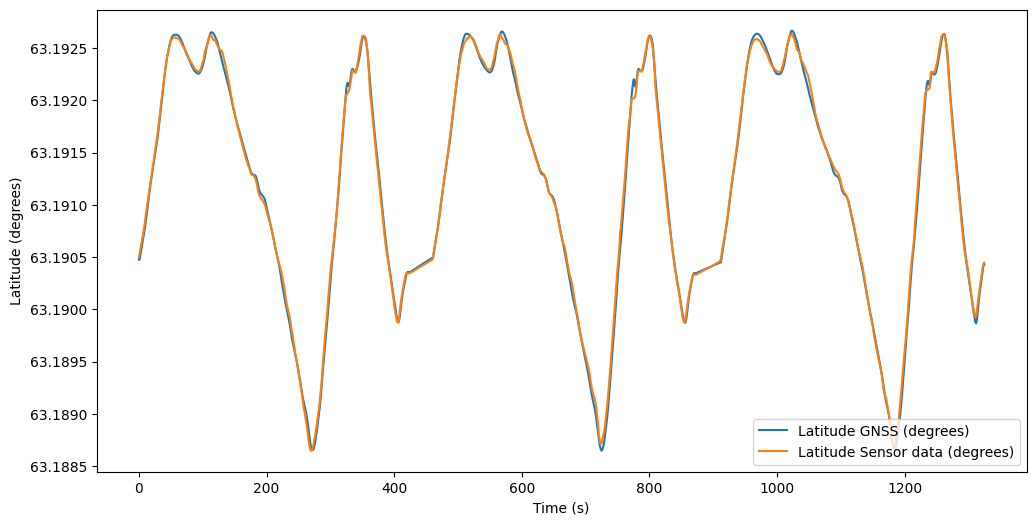

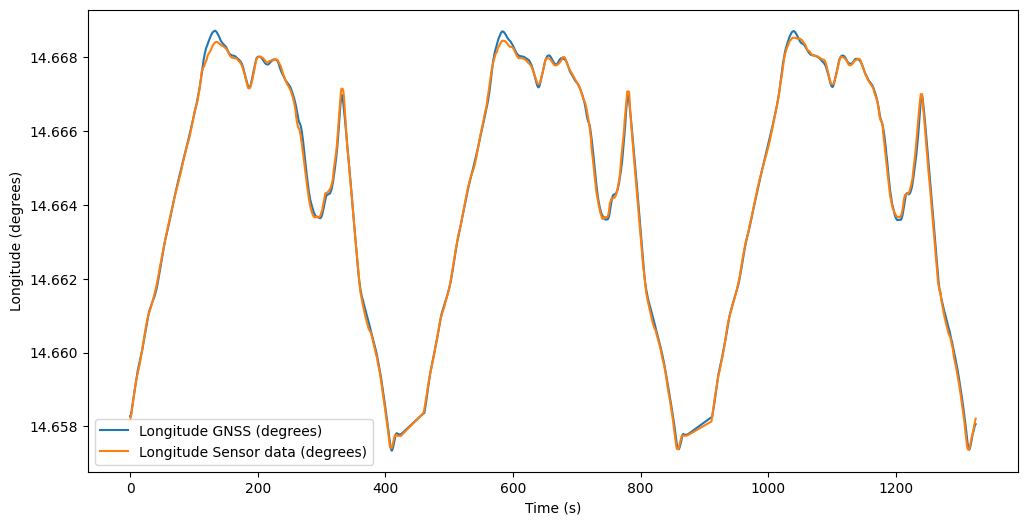

Plotting data for file: BIA24-8_WR_merged_with_gear.csv


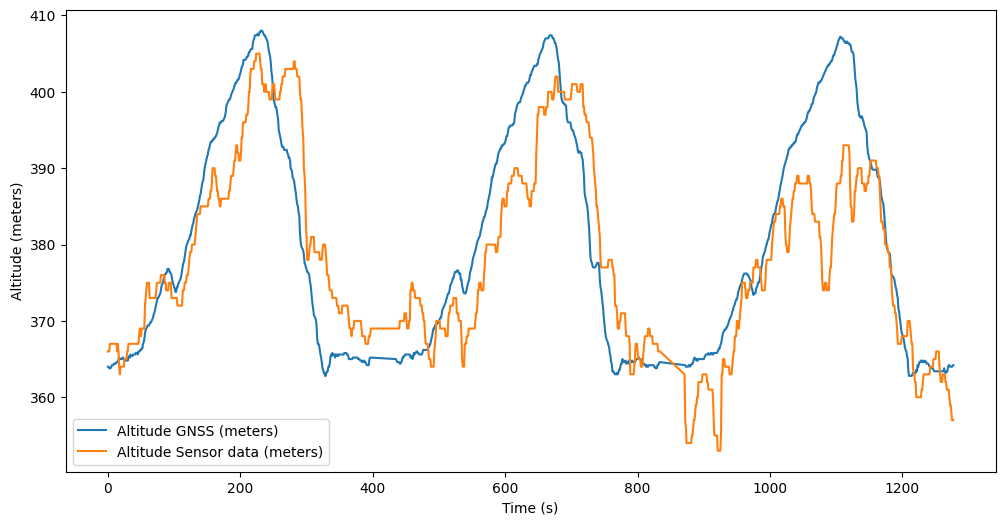

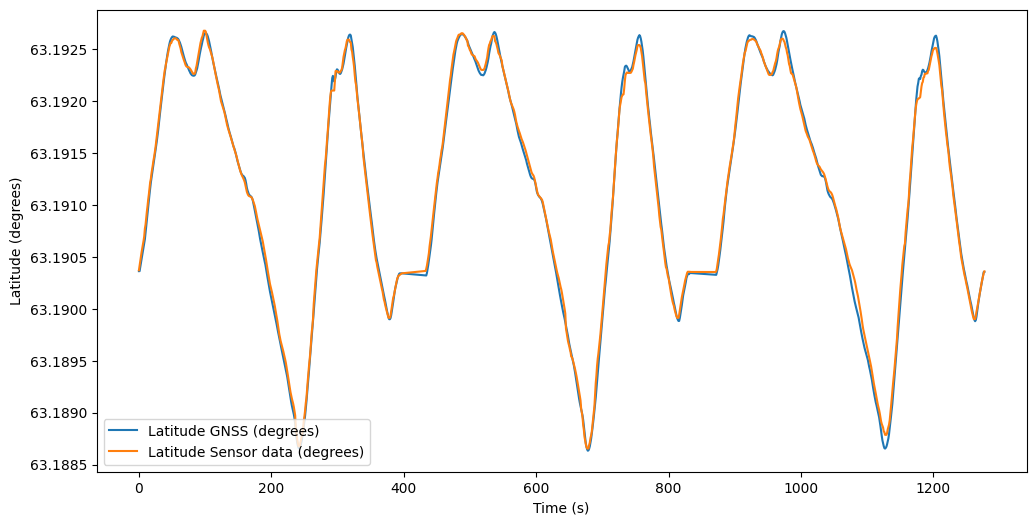

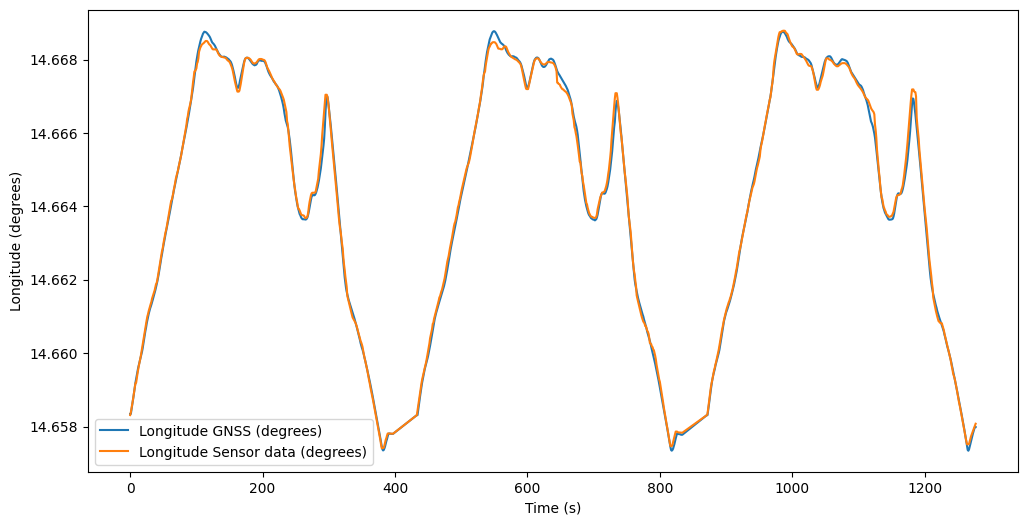

Plotting data for file: BIA24-3_NR_merged_with_gear.csv


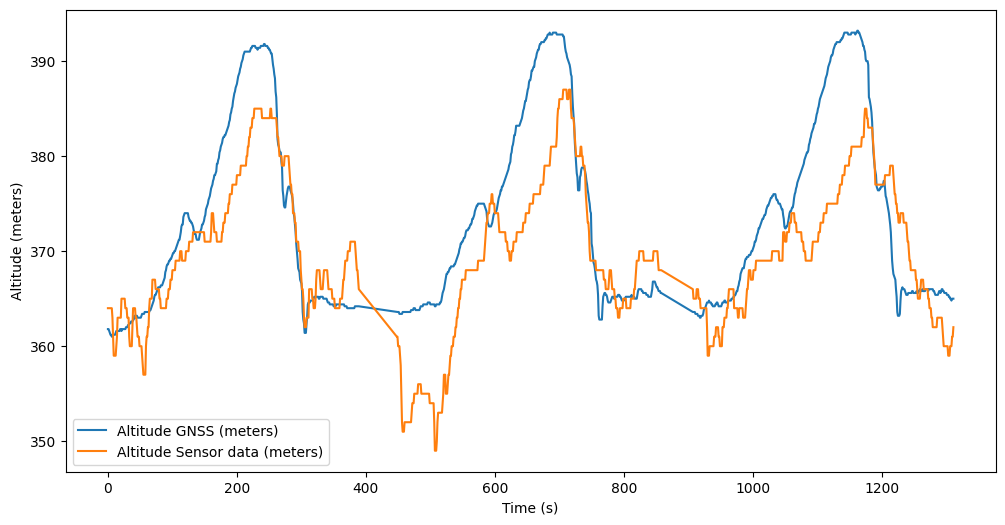

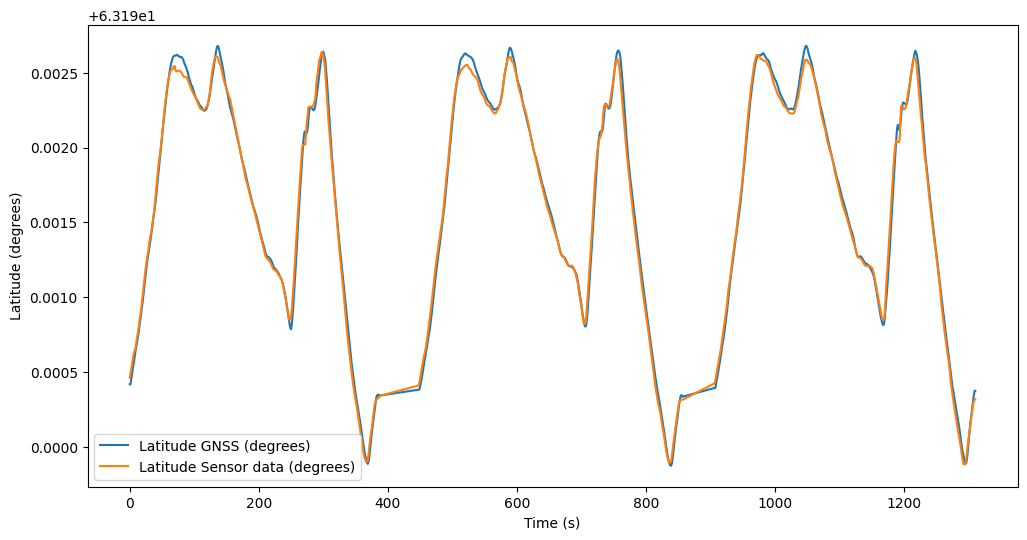

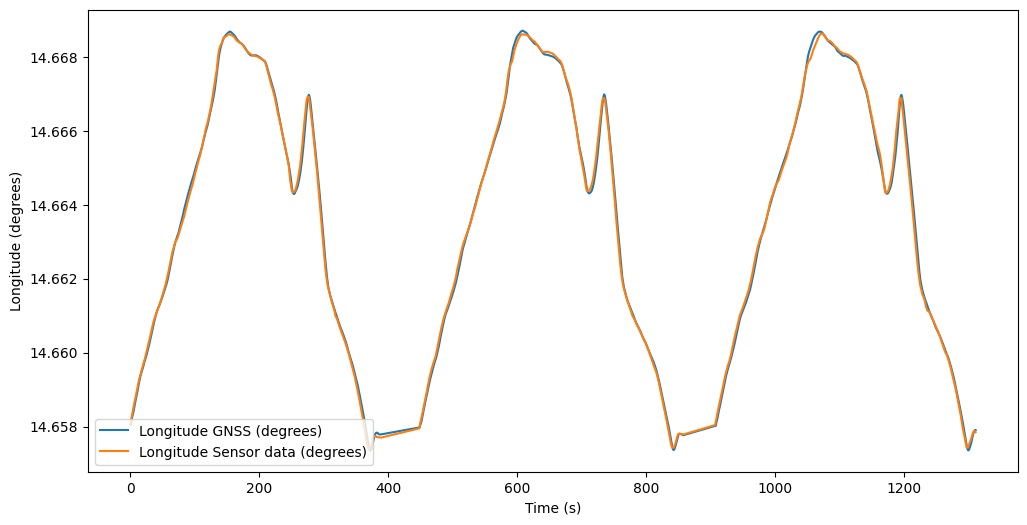

Plotting data for file: BIA24-22_WR_merged_with_gear.csv


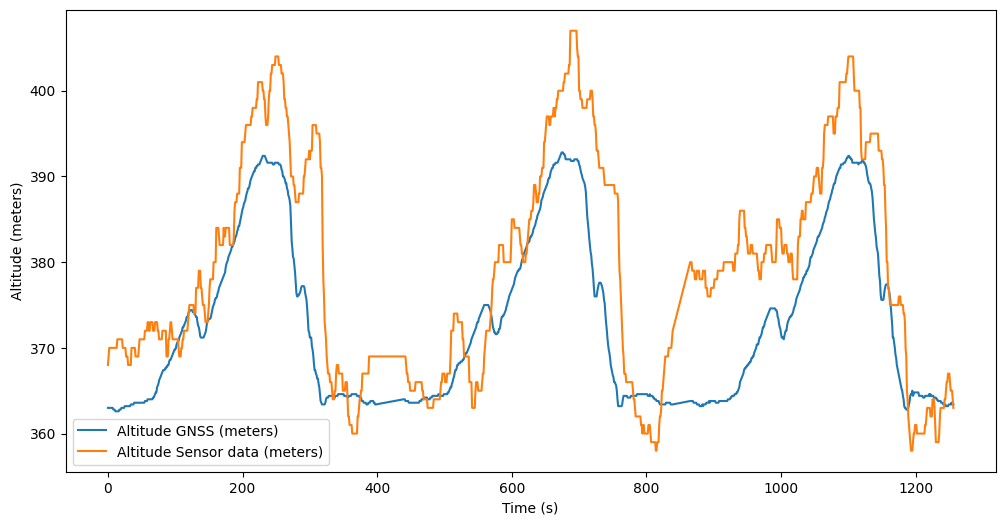

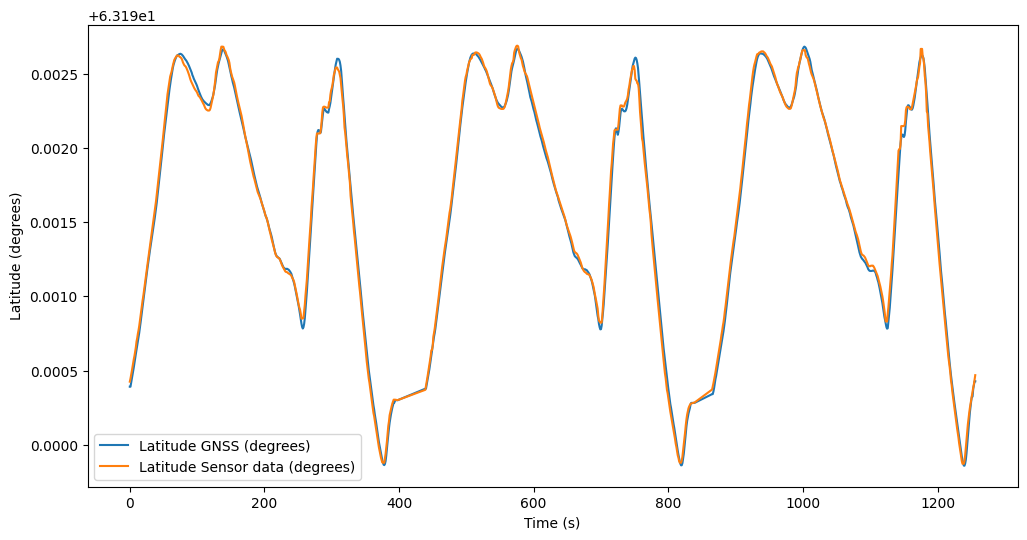

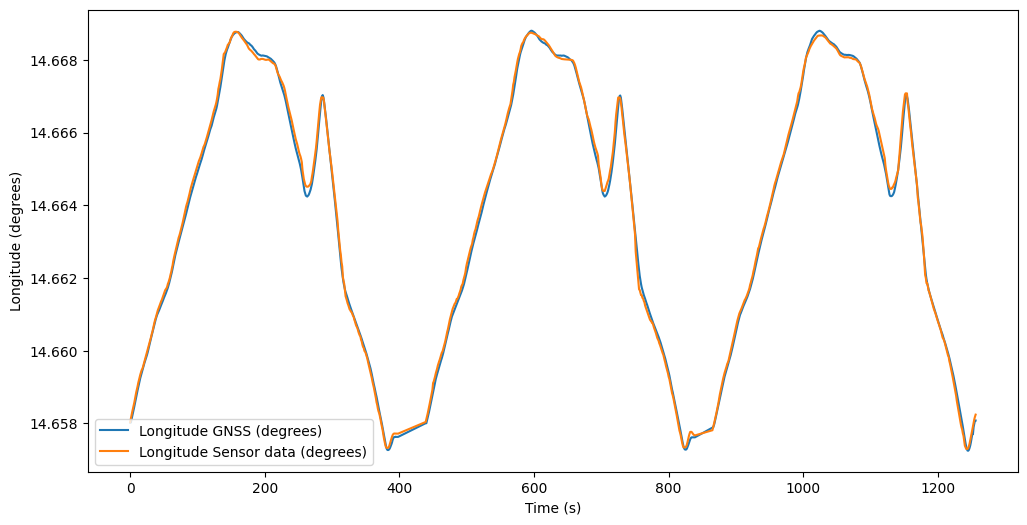

Plotting data for file: BIA24-22_NR_merged_with_gear.csv


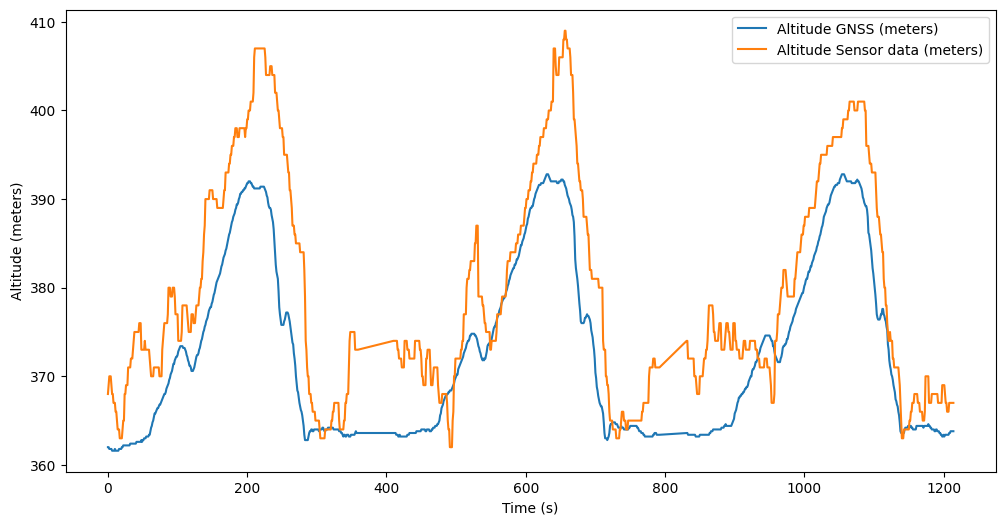

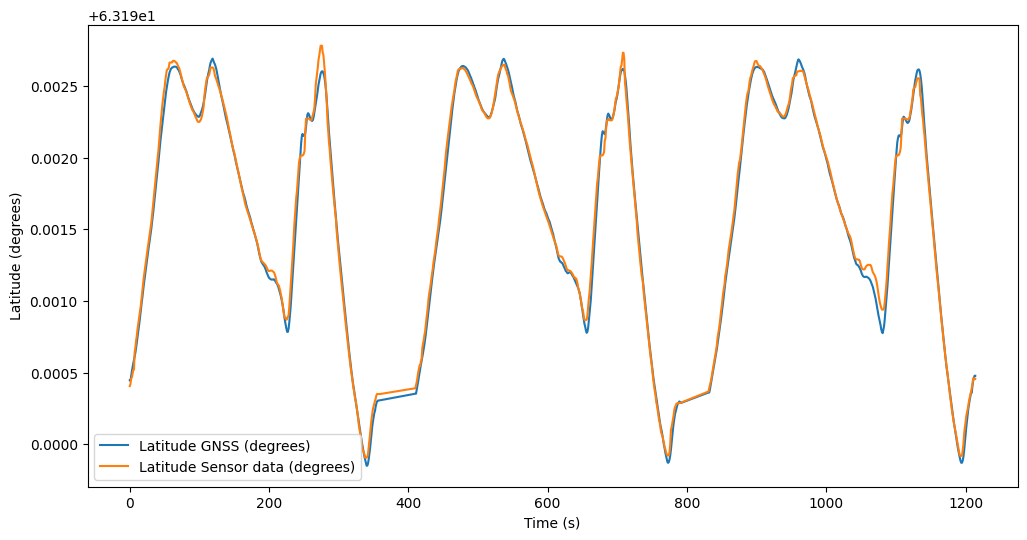

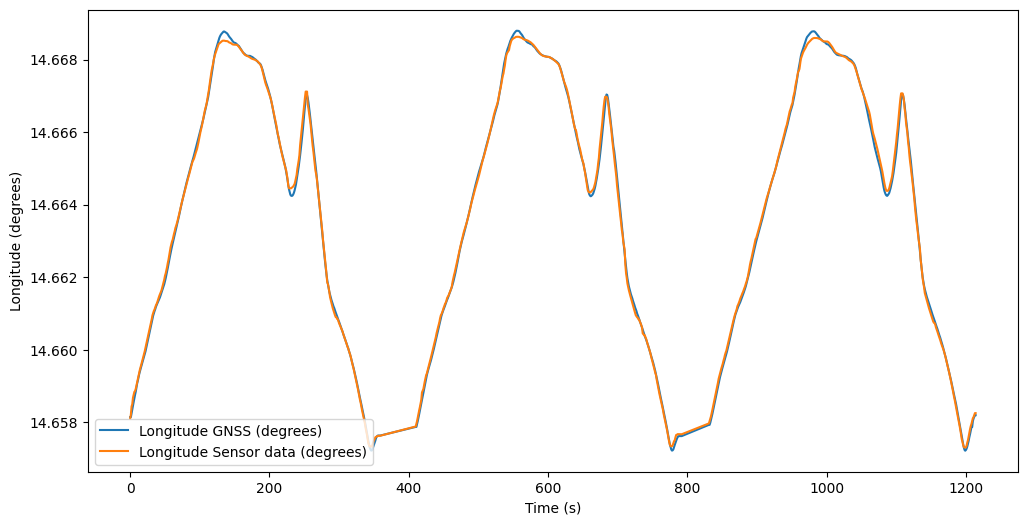

Plotting data for file: BIA24-3_WR_merged_with_gear.csv


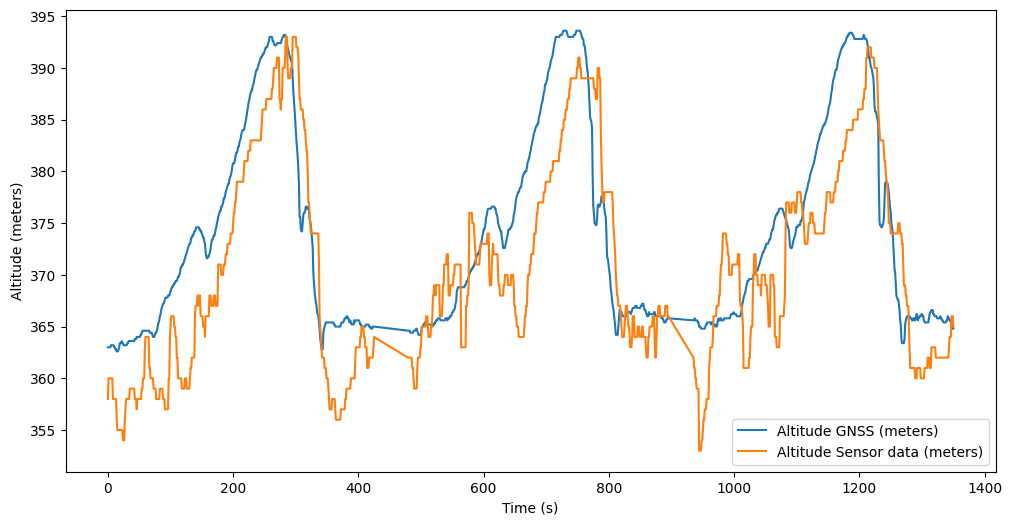

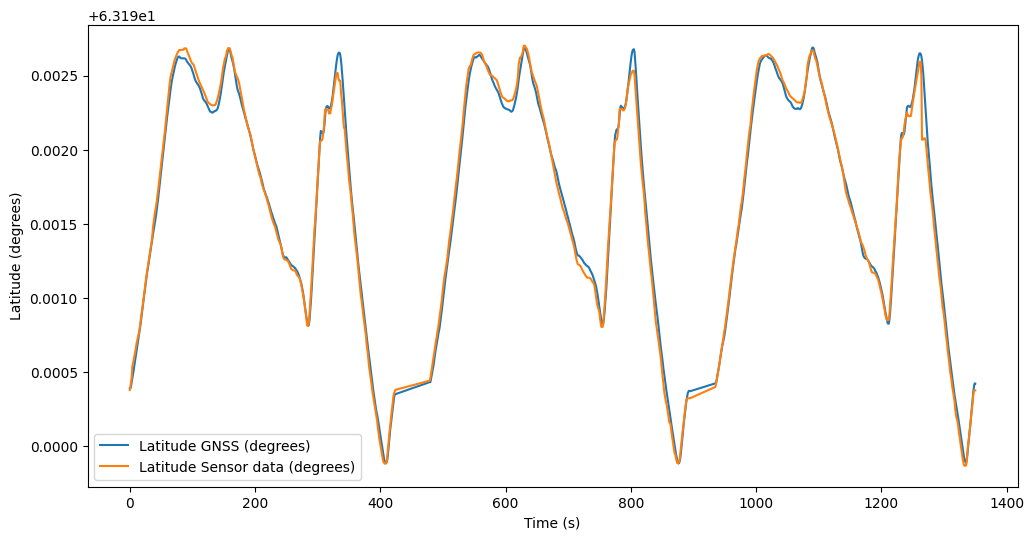

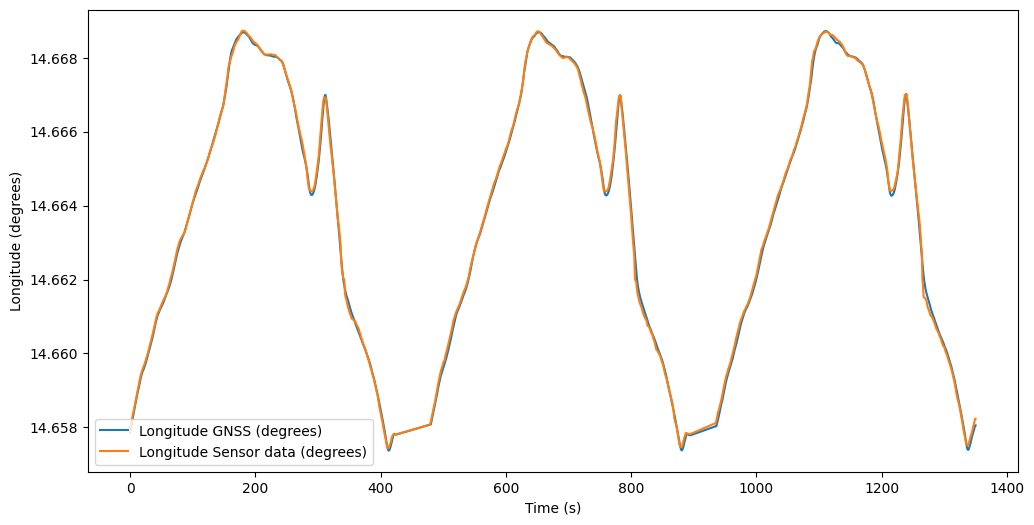

Plotting data for file: BIA24-4_NR_merged_with_gear.csv


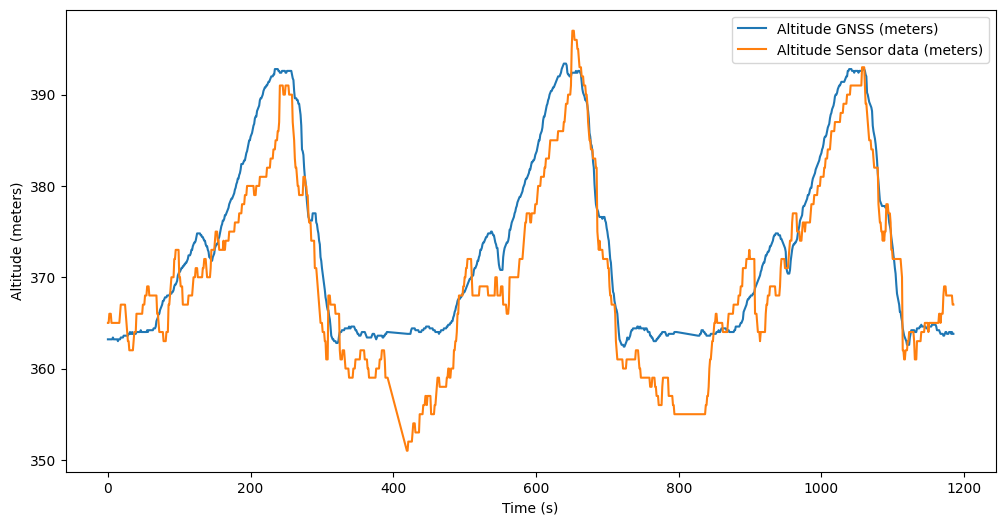

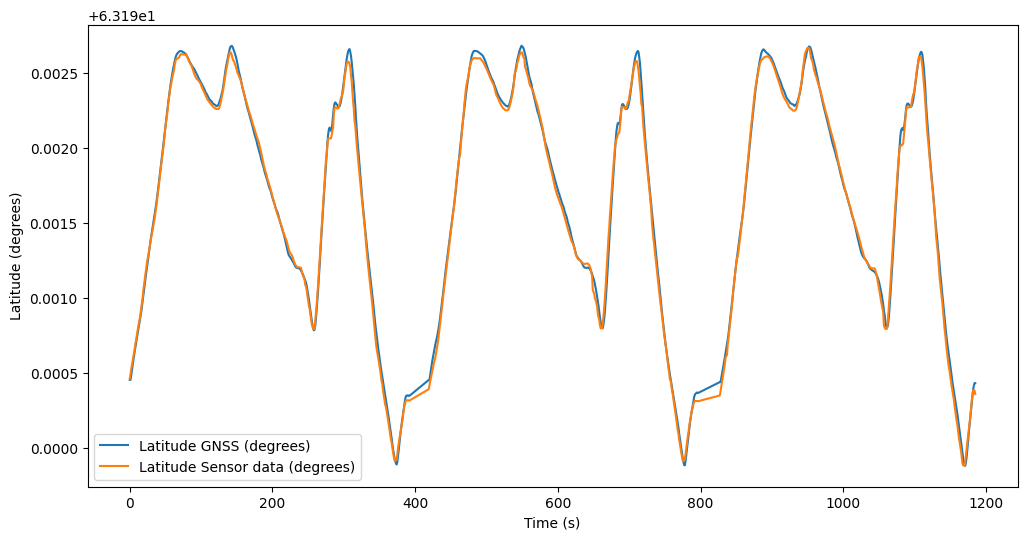

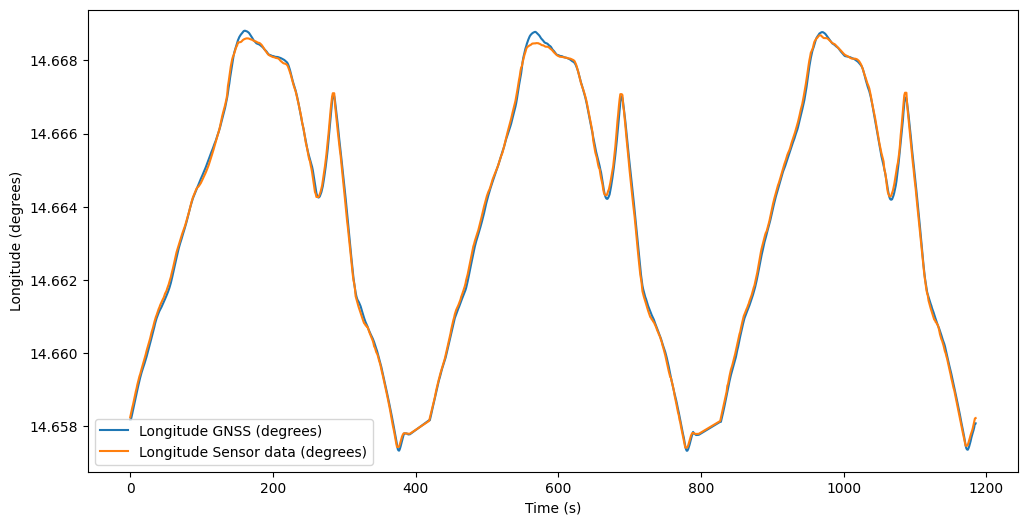

Plotting data for file: BIA24-16_NR_merged_with_gear.csv


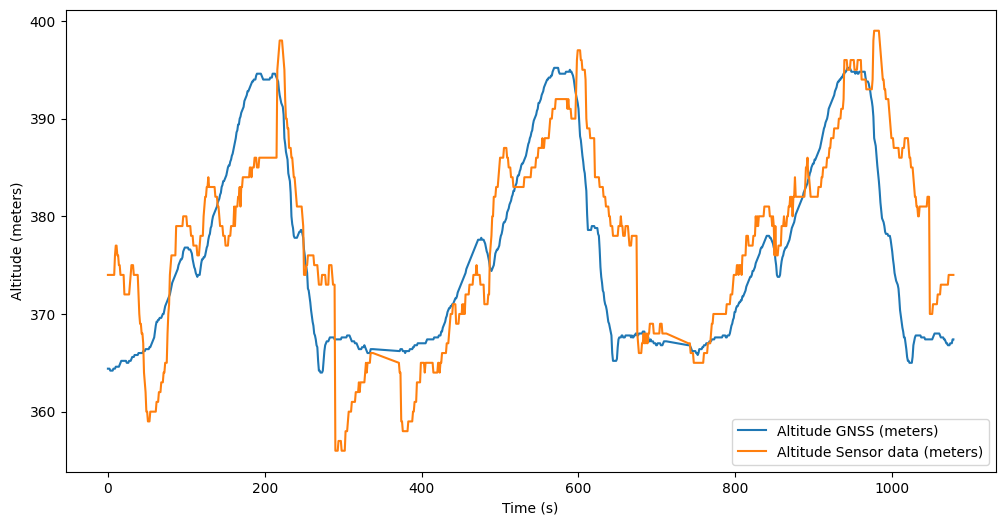

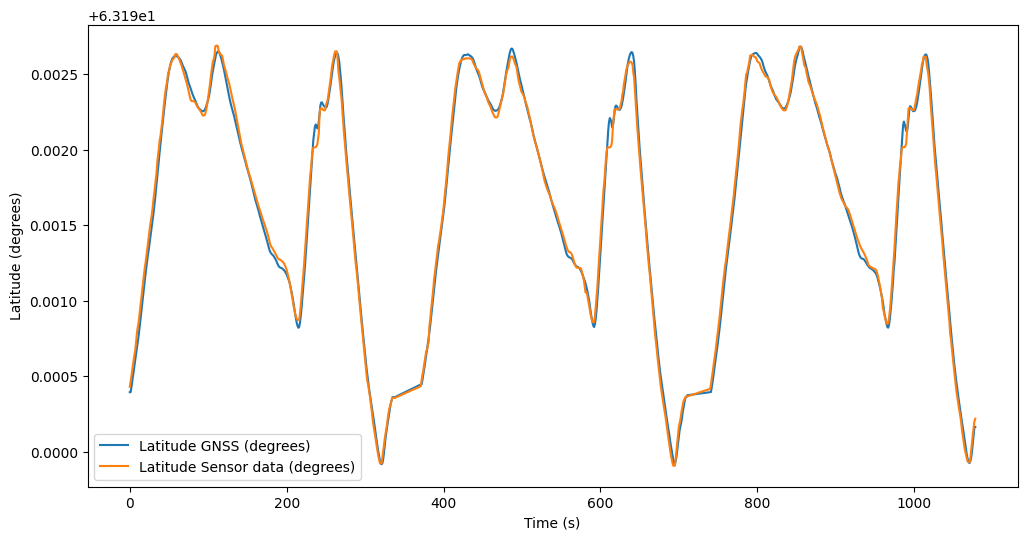

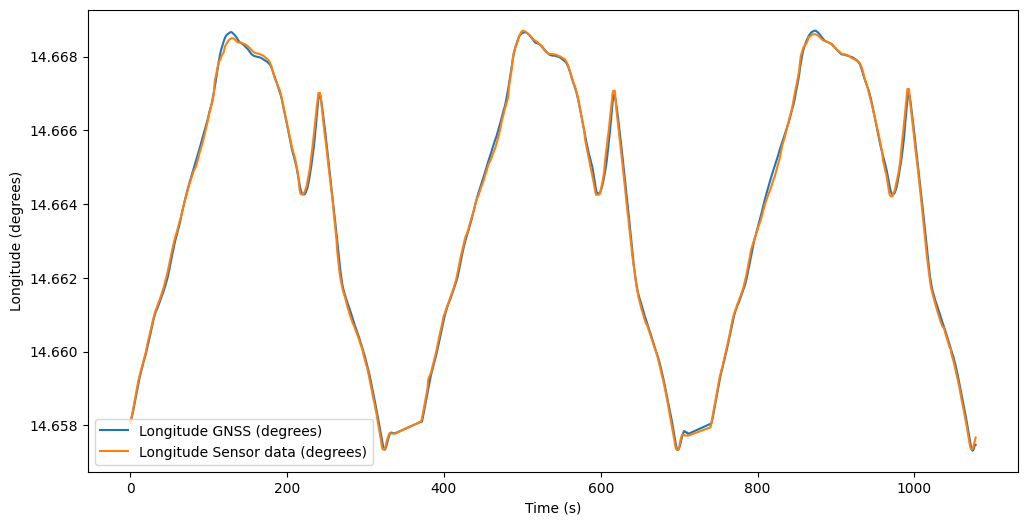

Plotting data for file: BIA24-9_WR_merged_with_gear.csv


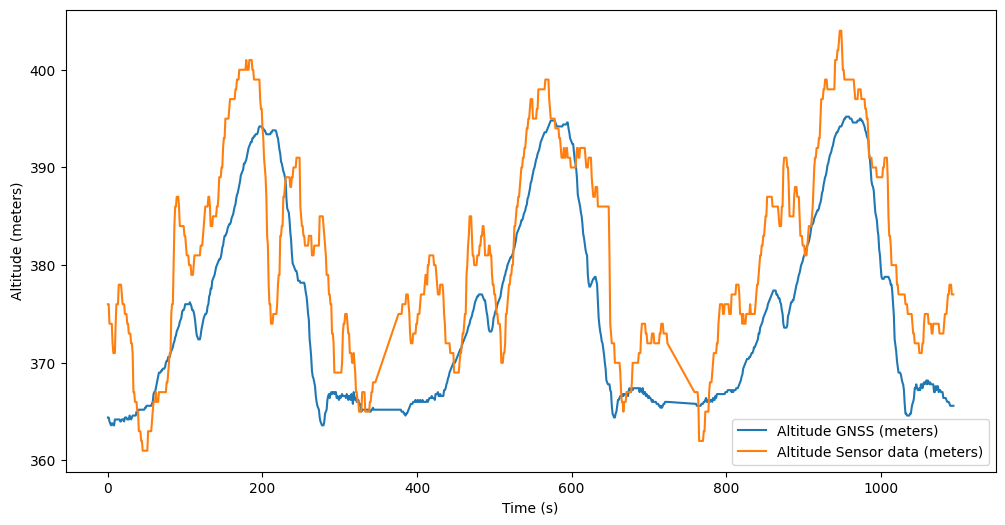

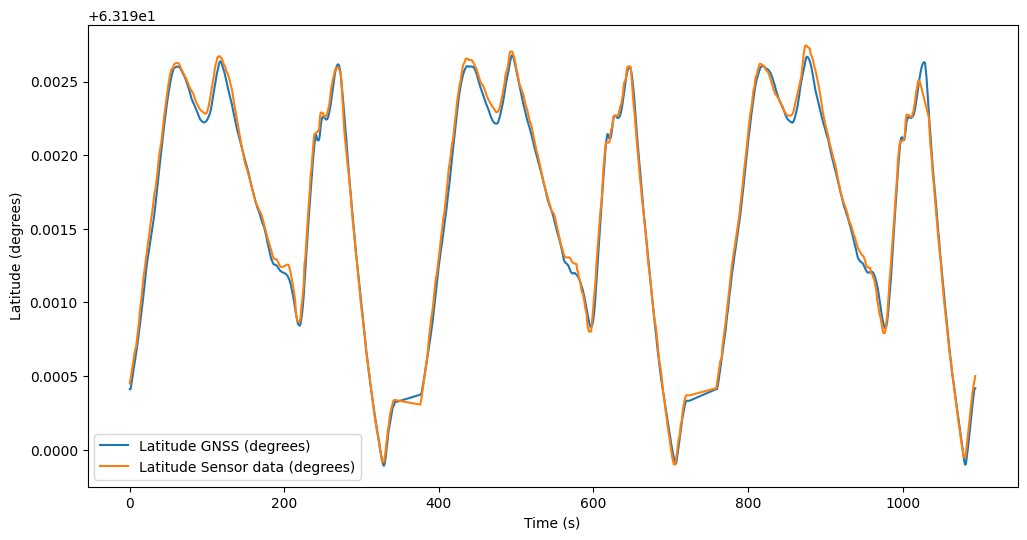

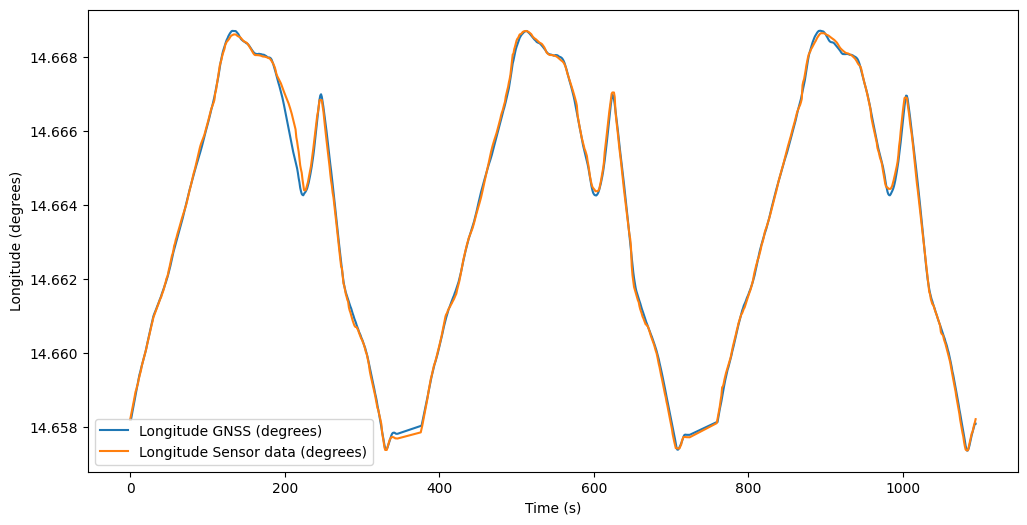

Plotting data for file: BIA24-19_NR_merged_with_gear.csv


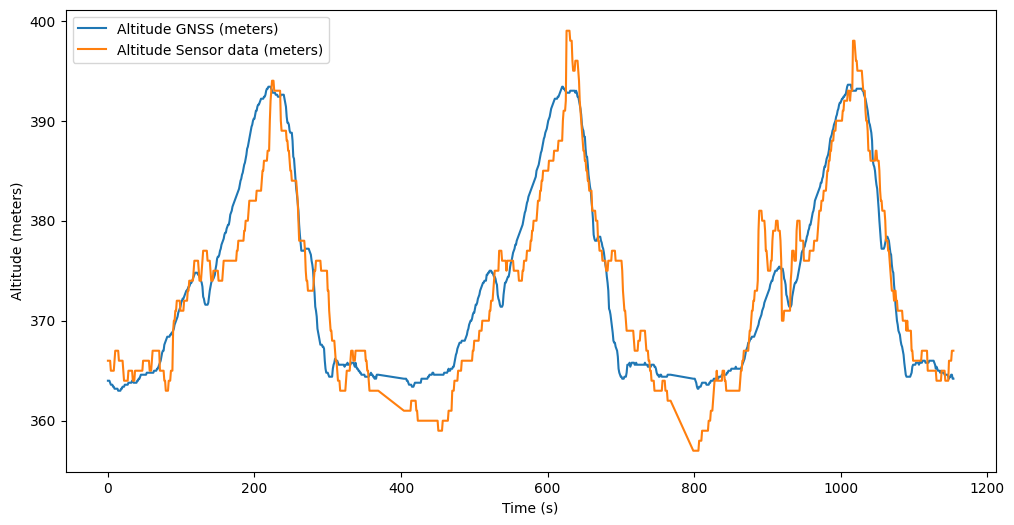

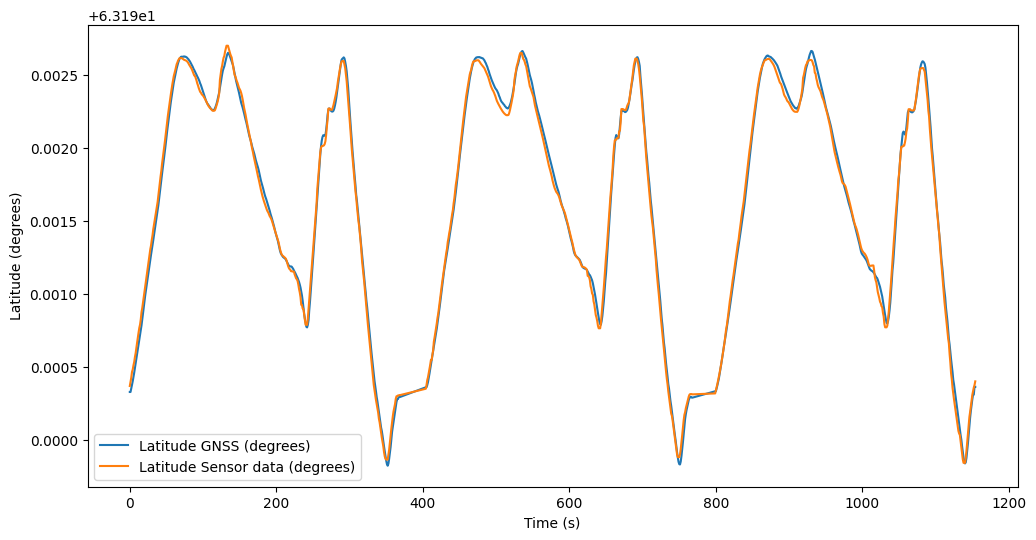

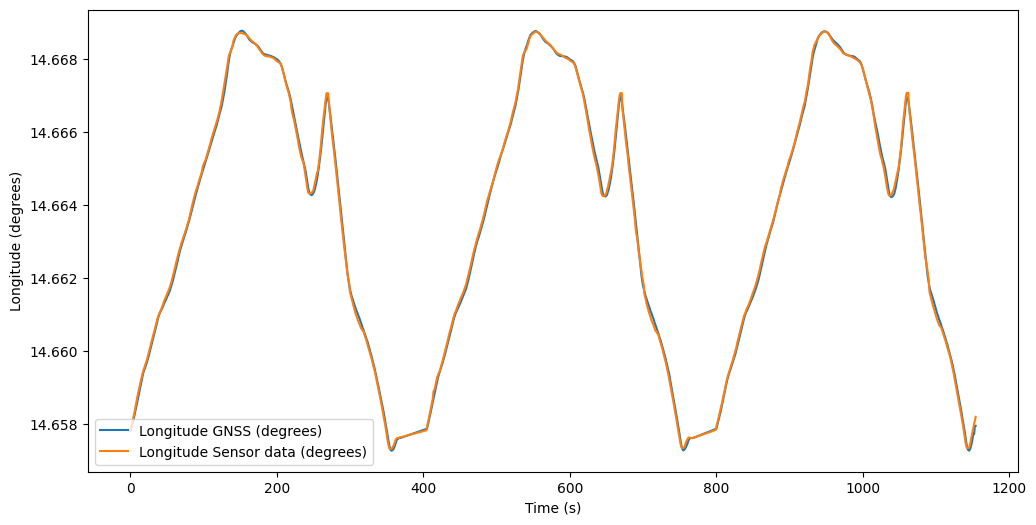

Plotting data for file: BIA24-19_WR_merged_with_gear.csv


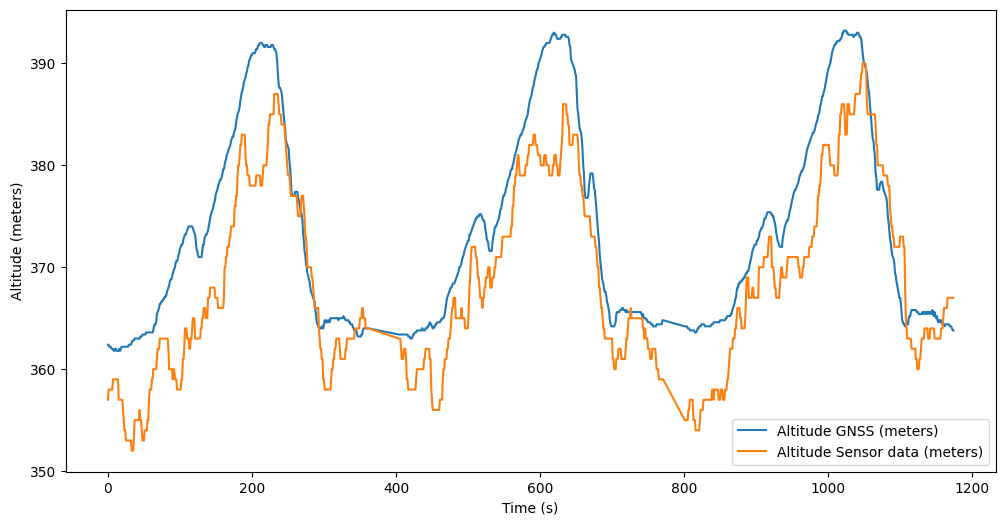

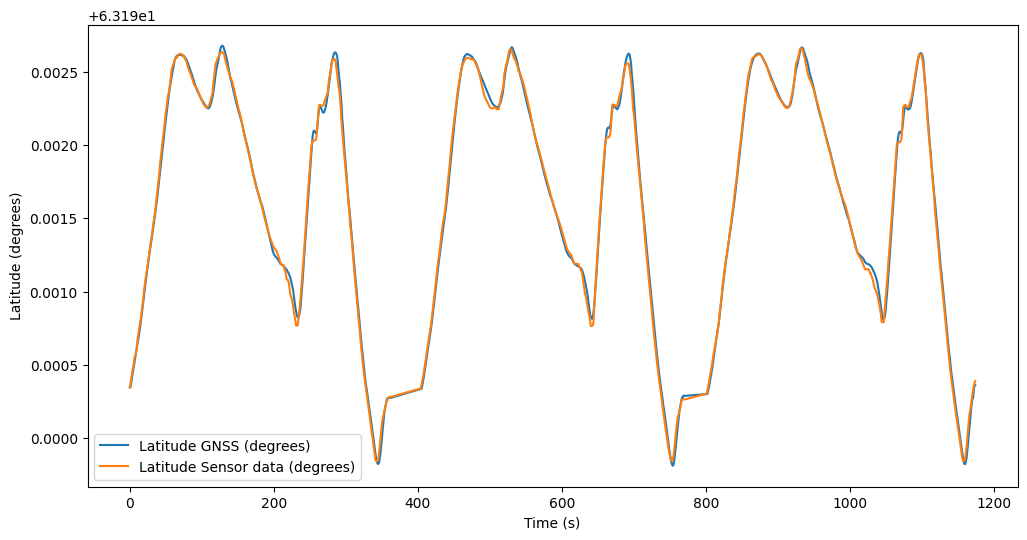

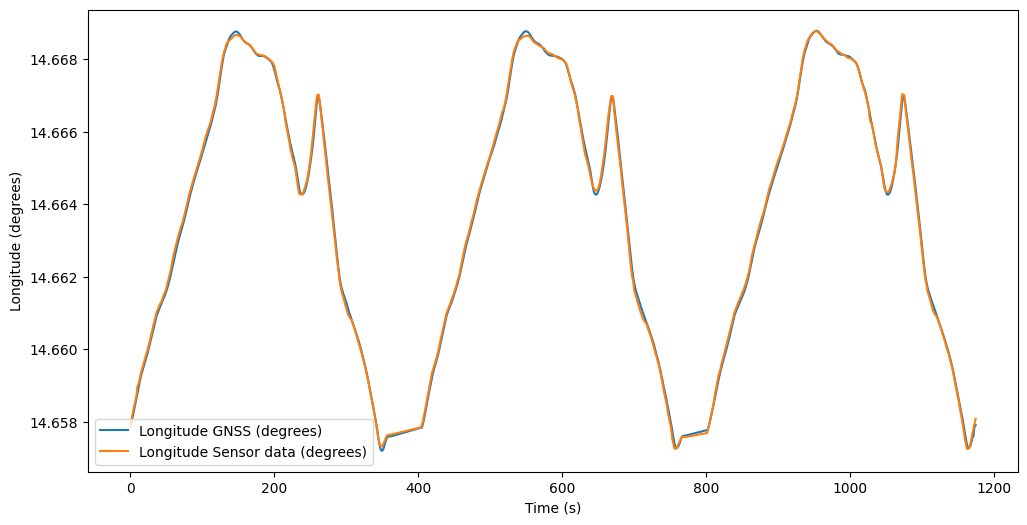

Plotting data for file: BIA24-9_NR_merged_with_gear.csv


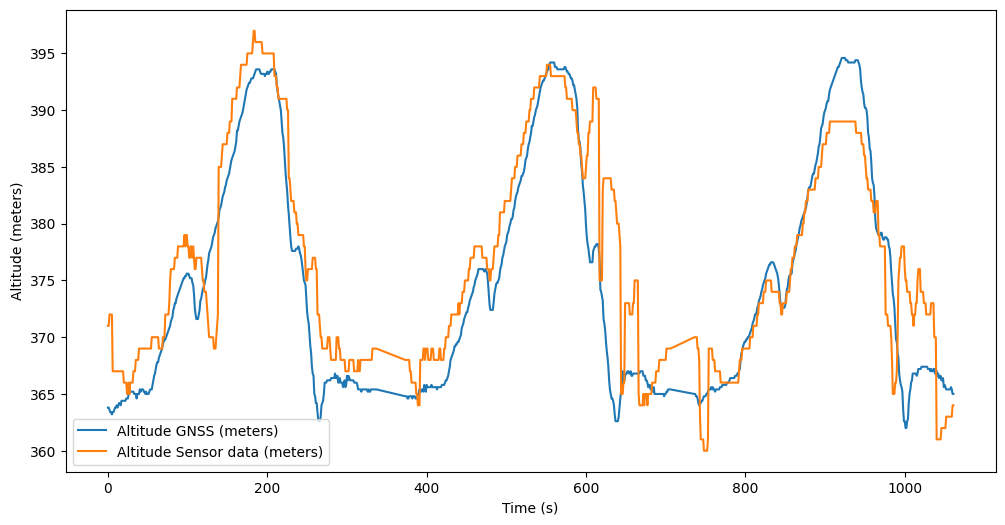

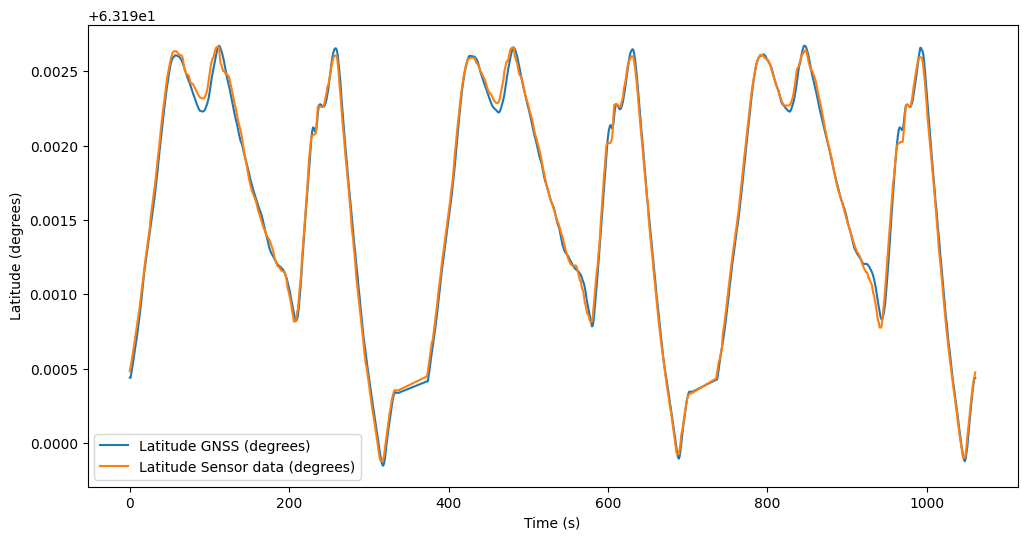

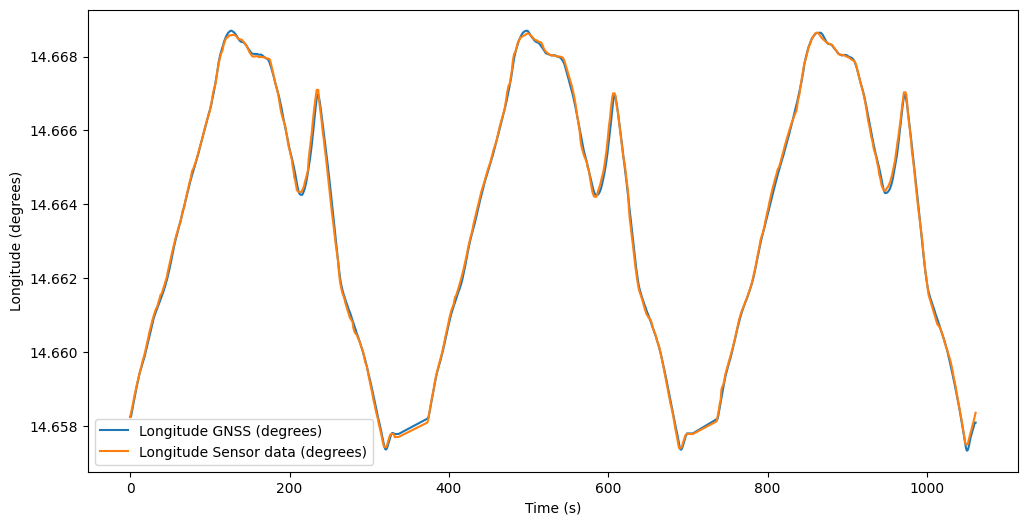

Plotting data for file: BIA24-16_WR_merged_with_gear.csv


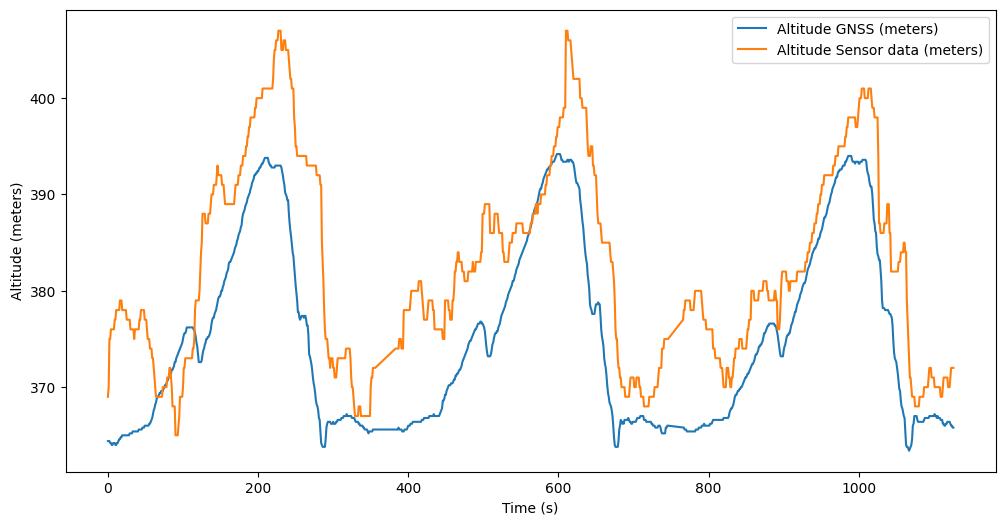

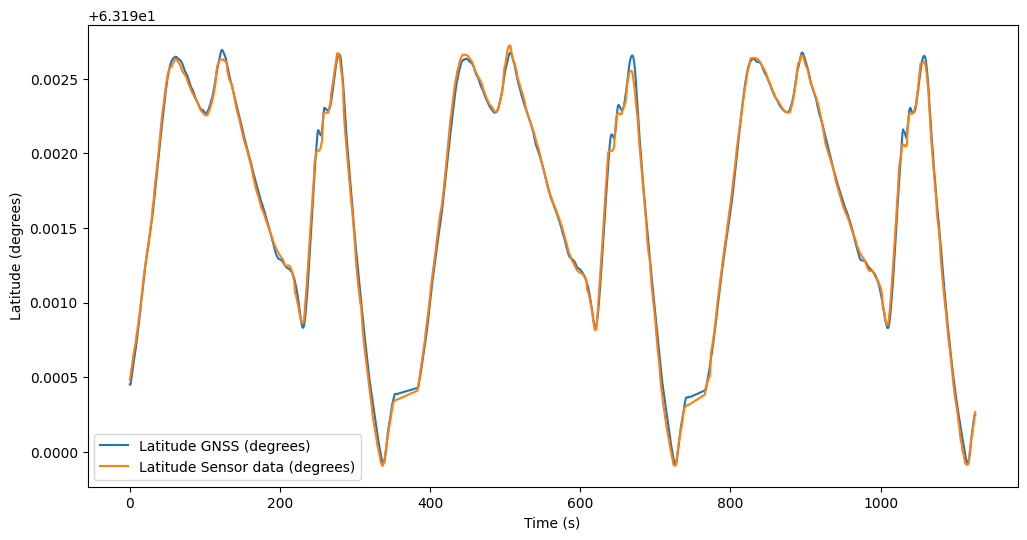

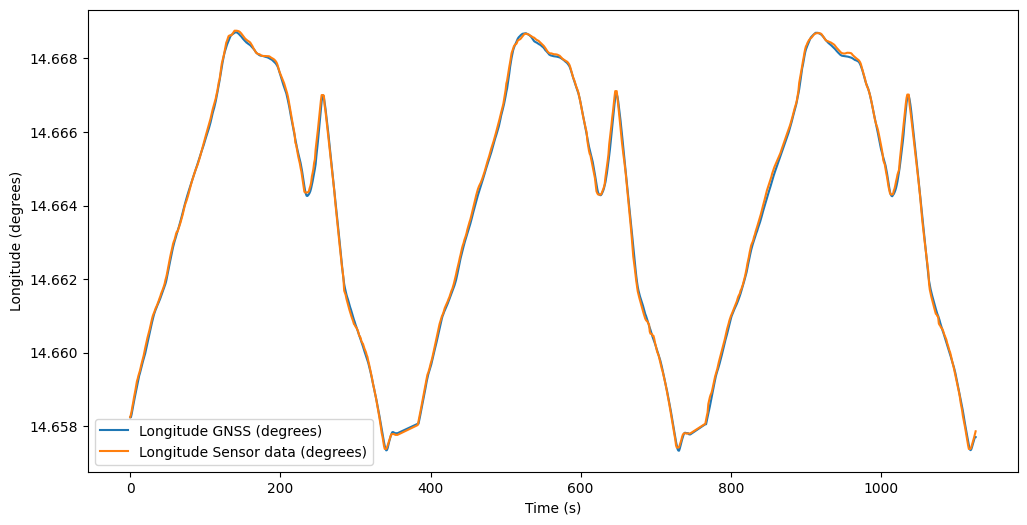

Plotting data for file: BIA24-5_NR_merged_with_gear.csv


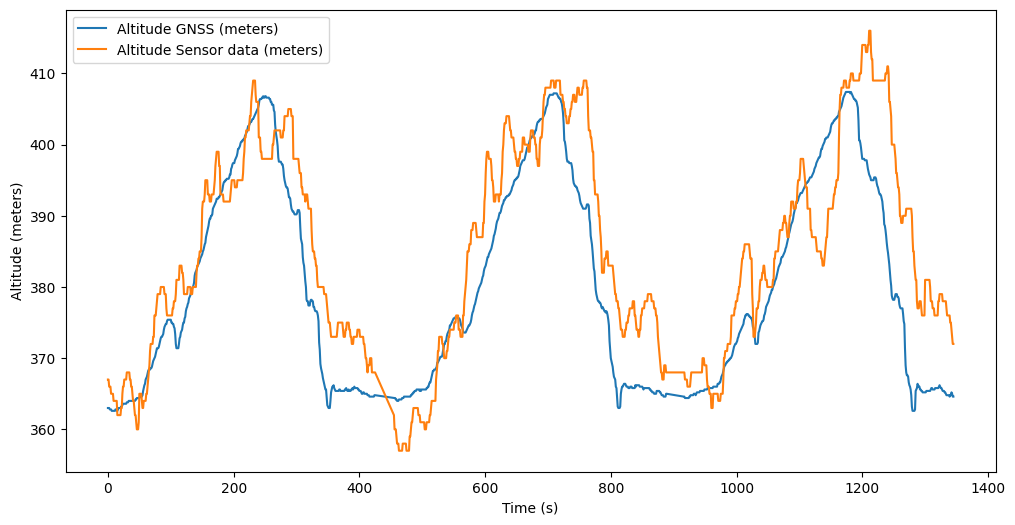

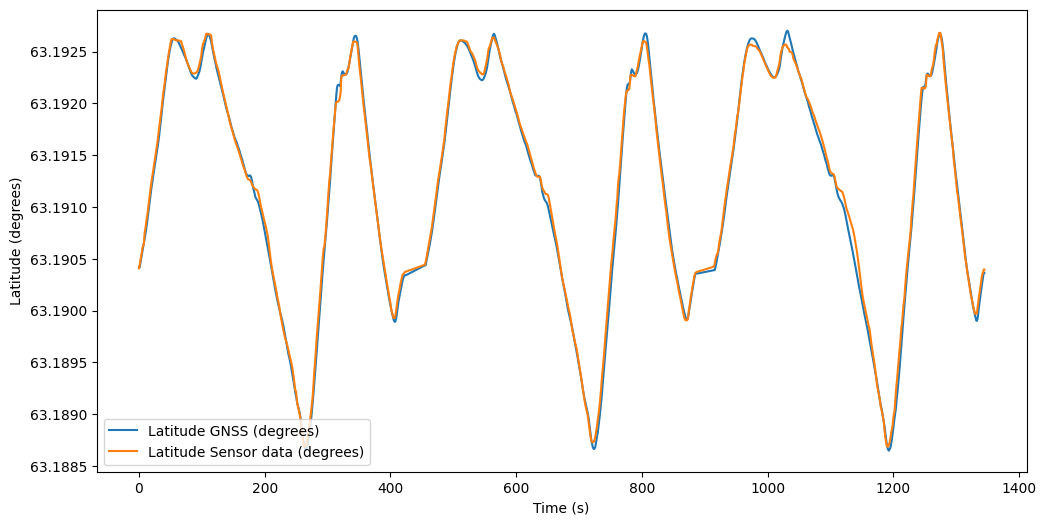

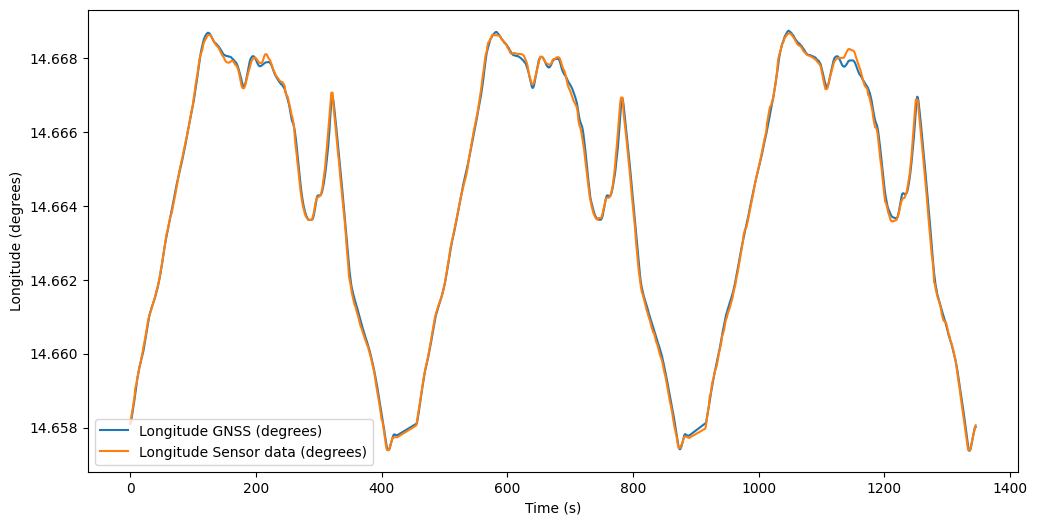

Plotting data for file: BIA24-15_WR_merged_with_gear.csv


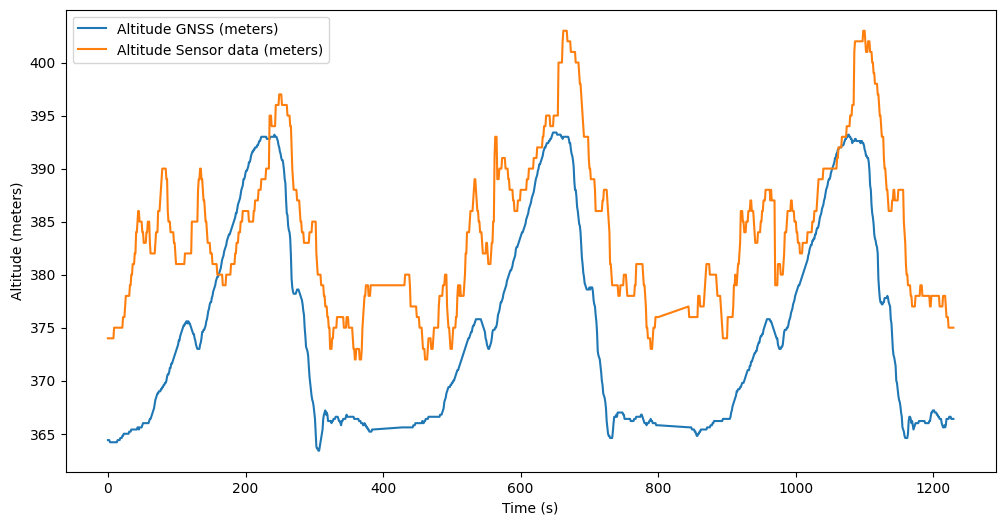

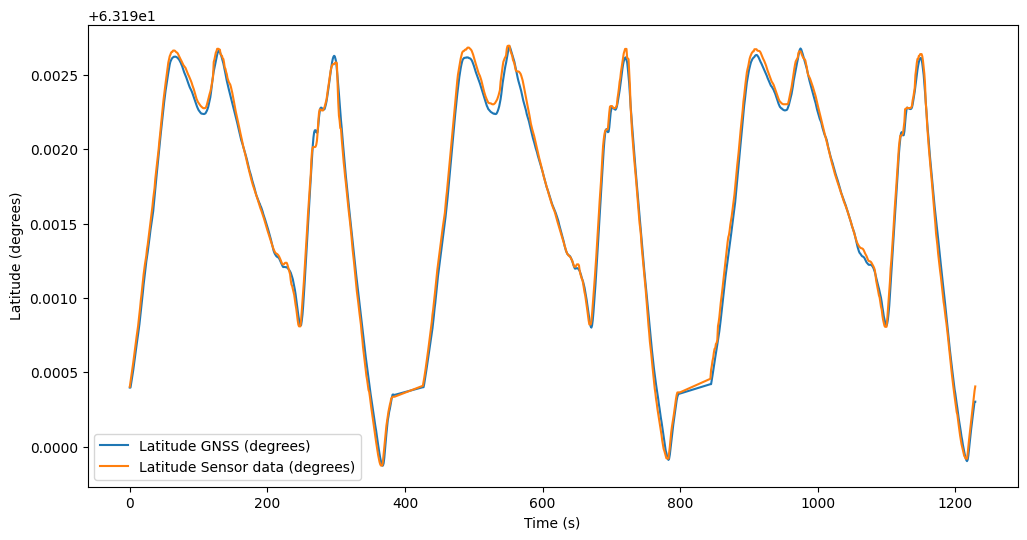

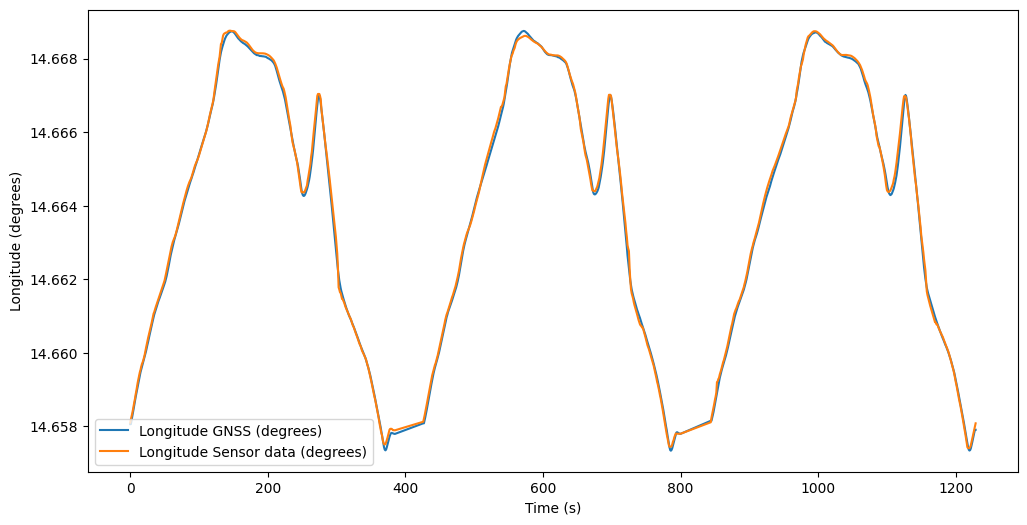

Plotting data for file: BIA24-15_NR_merged_with_gear.csv


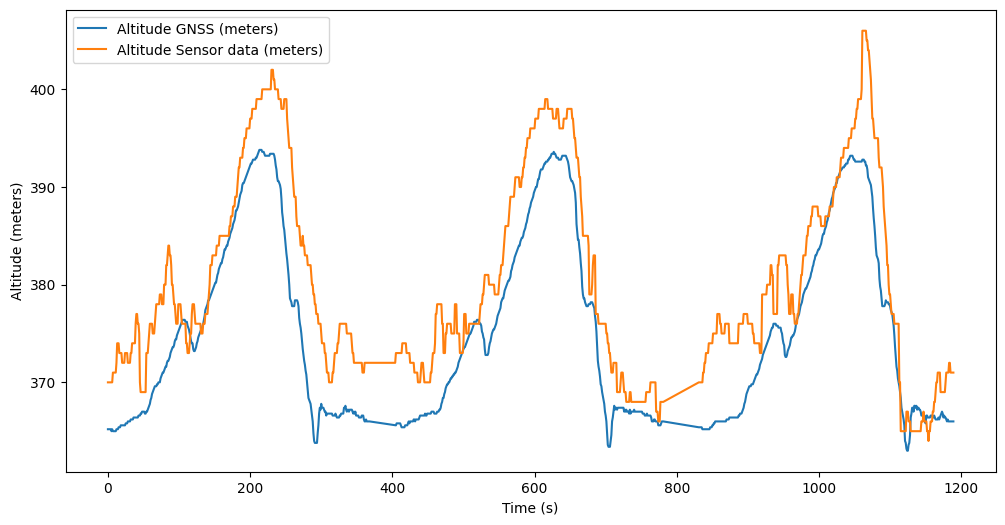

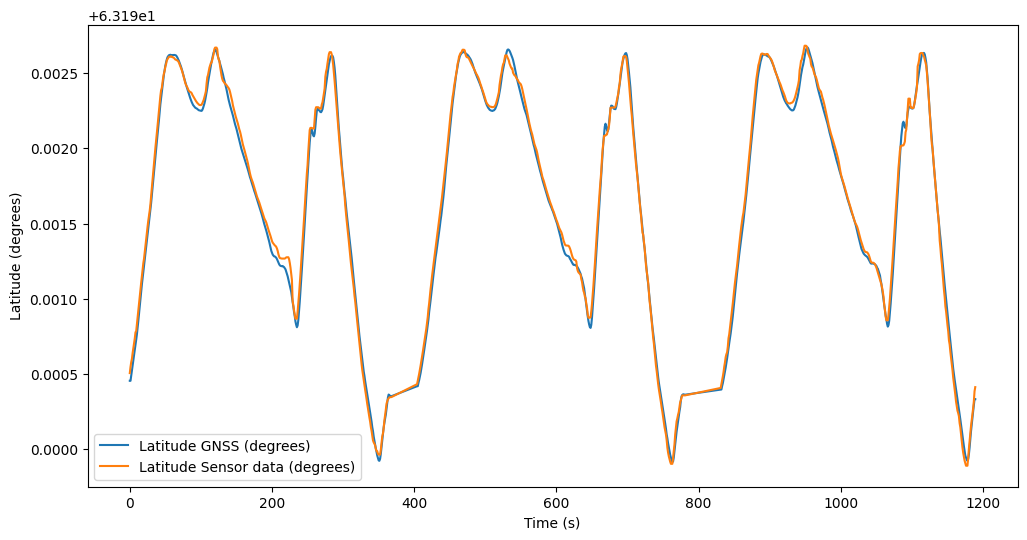

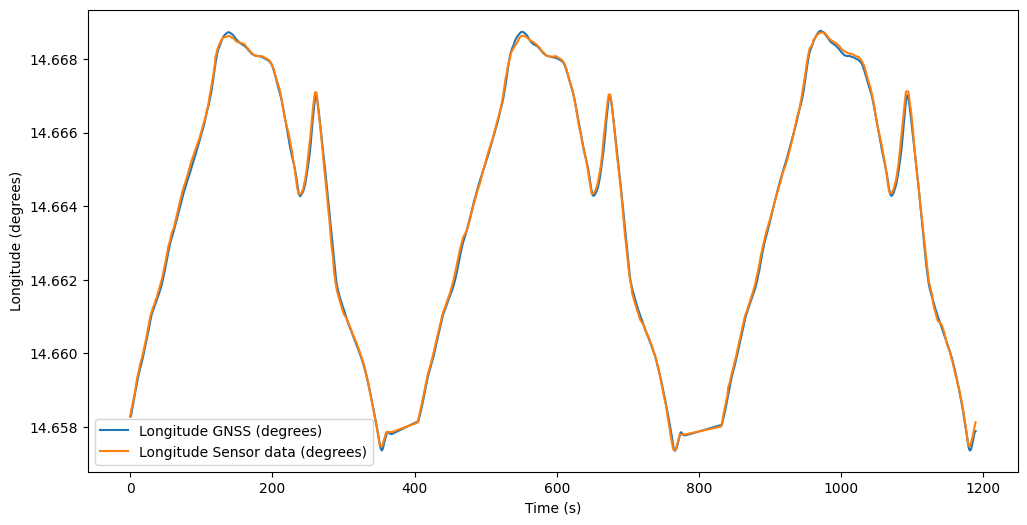

Plotting data for file: BIA24-5_WR_merged_with_gear.csv


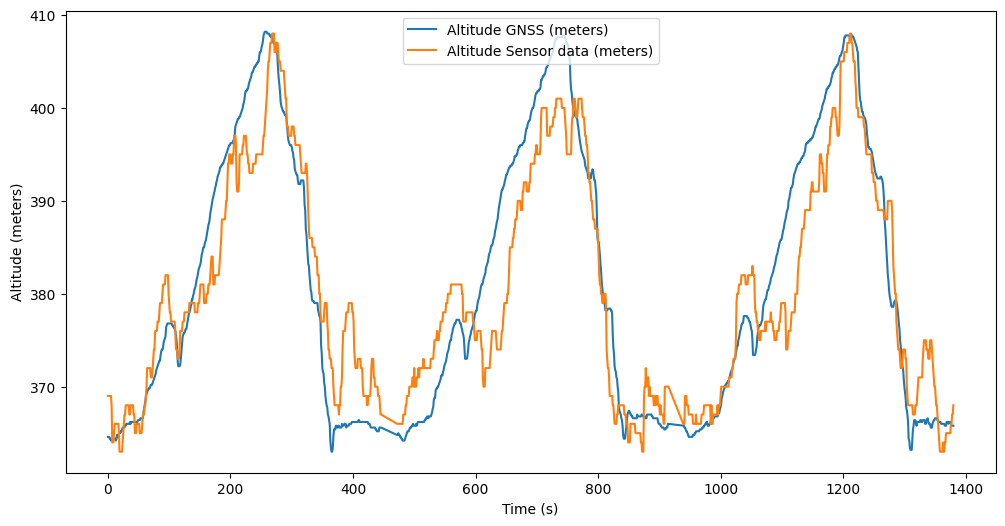

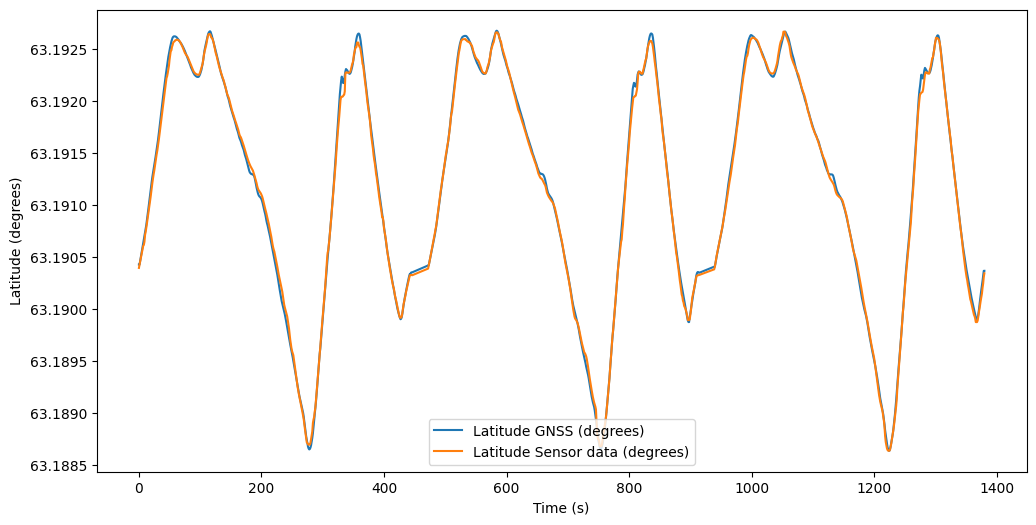

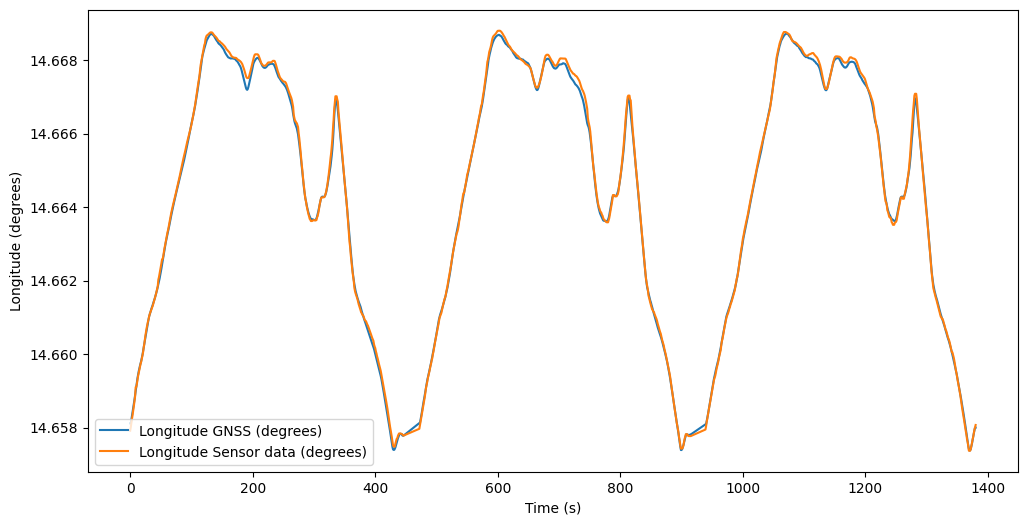

Plotting data for file: BIA24-20_WR_merged_with_gear.csv


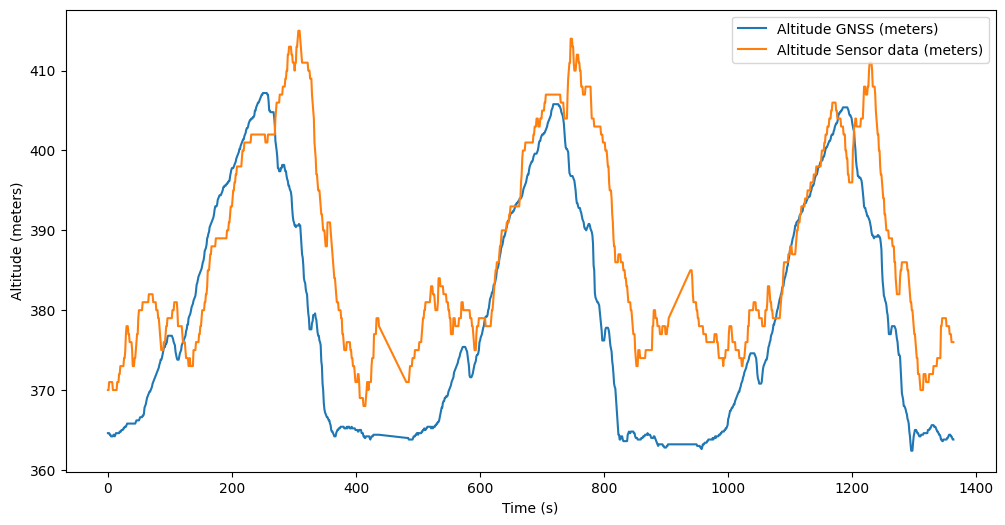

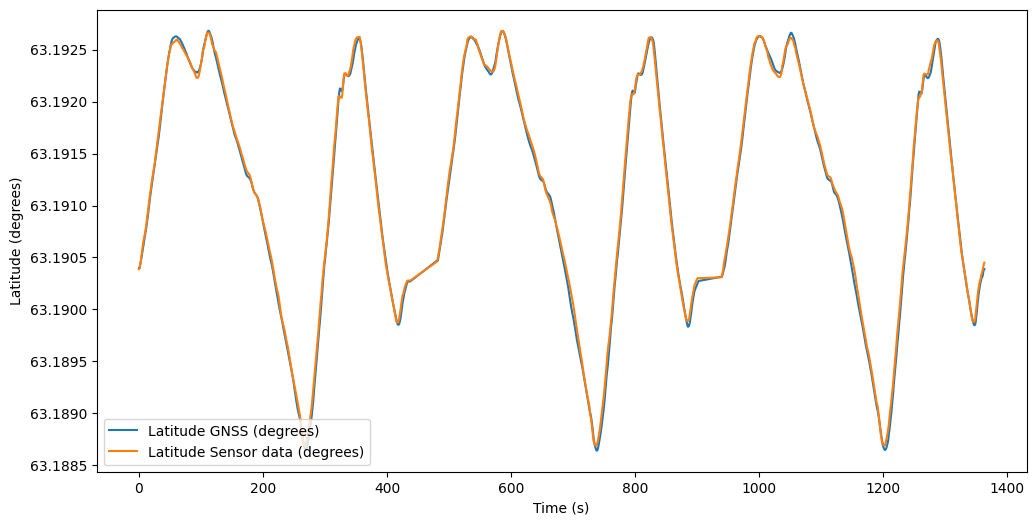

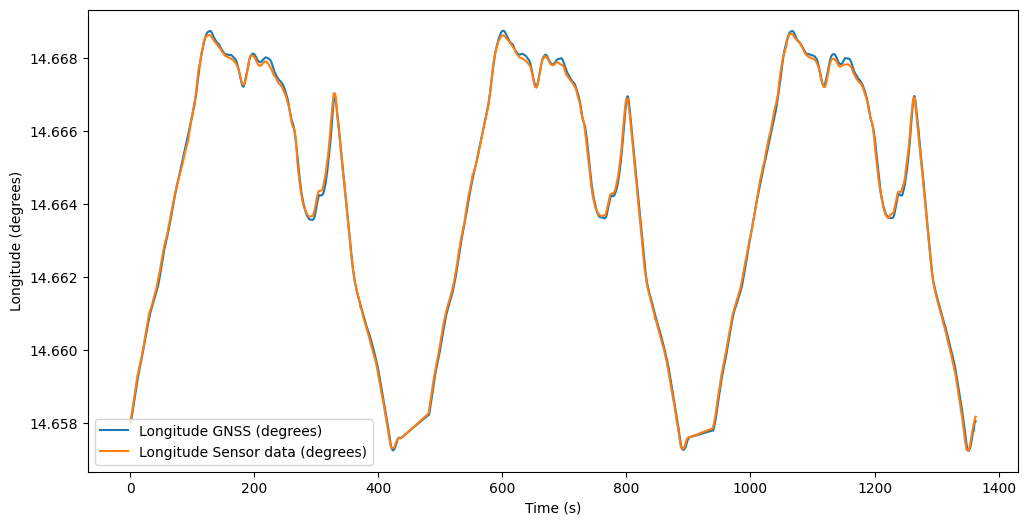

Plotting data for file: BIA24-20_NR_merged_with_gear.csv


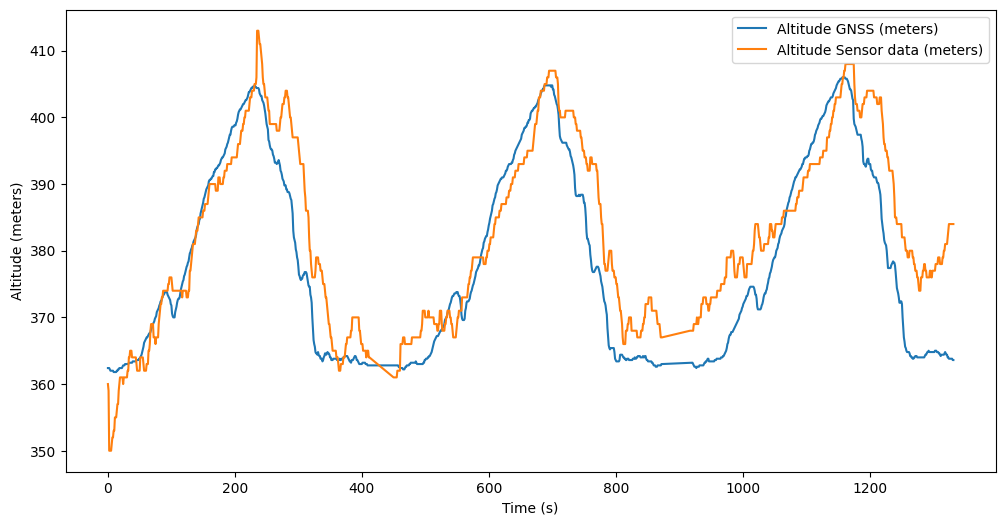

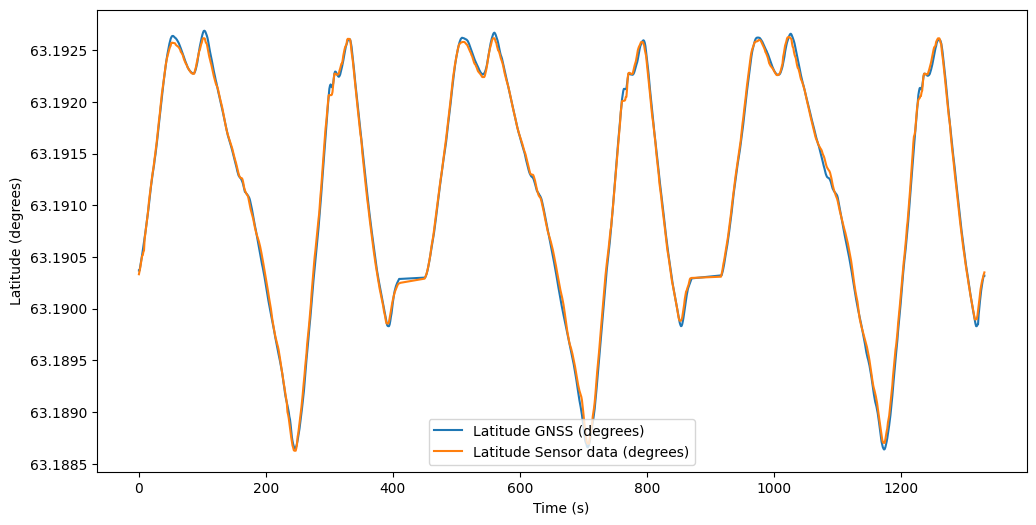

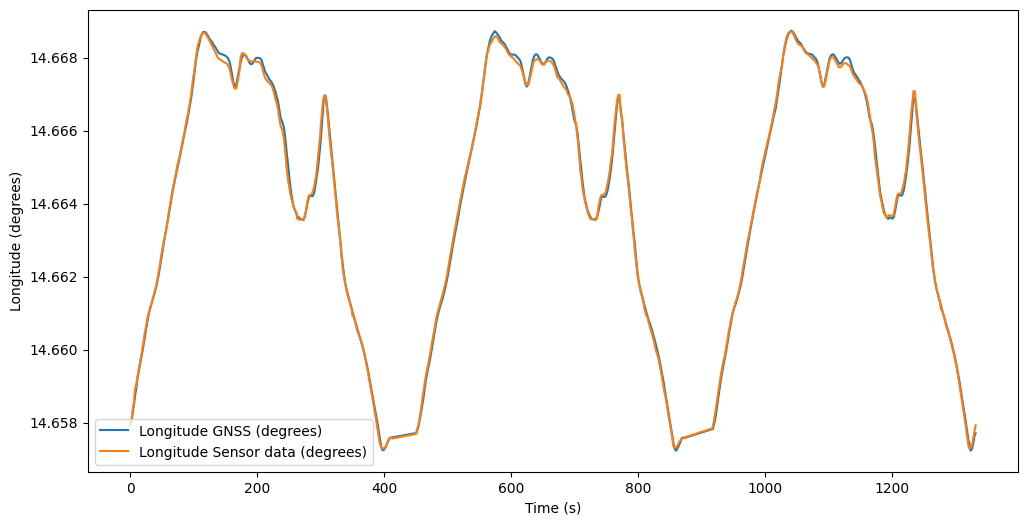

In [17]:
for file in files:
    print(f"Plotting data for file: {file.name}")
    plot_comparison_alt_lat_lon_all_skiers(file)